<a href="https://colab.research.google.com/github/MAYURANILPATIL/Rainfall-Prediction-Model/blob/main/Rainfall_Prediction_Aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainfall Prediction Readme ☔️

## Overview

This repository contains a Python script for predicting rainfall using a variety of machine learning models. The script includes functions for loading and preprocessing data, training and evaluating models, and making predictions.

## Installation

To install the necessary libraries, run the following command:

In [2]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,2011-02-16,NorfolkIsland,21.9,26.1,0.0,6.4,8.2,ESE,46.0,ESE,ESE,24.0,28.0,75.0,69.0,1018.2,1016.4,7.0,6.0,24.2,25.6,No,No
21896,2011-02-17,NorfolkIsland,22.0,27.0,0.0,4.0,4.0,ESE,48.0,ESE,ESE,20.0,28.0,79.0,82.0,1015.9,1014.3,7.0,7.0,25.4,25.0,No,Yes
21897,2011-02-18,NorfolkIsland,22.9,28.0,3.4,3.8,2.0,ENE,37.0,E,ENE,17.0,26.0,89.0,77.0,1014.7,1014.0,7.0,7.0,25.1,27.0,Yes,Yes
21898,2011-02-19,NorfolkIsland,22.2,26.9,4.2,5.2,10.7,E,43.0,E,ESE,26.0,30.0,80.0,69.0,1015.9,1014.5,4.0,6.0,25.2,25.2,Yes,No


##Checking for Datatypes, feature count,etc

In [5]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


##Handle Missing Values

In [6]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           2.041096
MaxTemp           1.493151
Rainfall          2.292237
Evaporation      65.662100
Sunshine         77.735160
WindGustDir      16.821918
WindGustSpeed    16.812785
WindDir9am       13.611872
WindDir3pm        8.552511
WindSpeed9am      3.246575
WindSpeed3pm      6.347032
Humidity9am       2.246575
Humidity3pm       5.415525
Pressure9am      16.392694
Pressure3pm      16.374429
Cloud9am         44.465753
Cloud3pm         45.890411
Temp9am           1.593607
Temp3pm           4.735160
RainToday         2.292237
RainTomorrow      2.292237
dtype: float64

In [7]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [15]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [16]:
df["Evaporation"]

0         3.8
1         3.2
2        18.4
3         5.8
4         5.8
         ... 
21895     6.4
21896     4.0
21897     3.8
21898     5.2
21899     8.8
Name: Evaporation, Length: 21900, dtype: float64

In [17]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [28]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,3.0,2.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,2011-02-16,NorfolkIsland,21.9,26.1,0.0,6.4,8.2,ESE,46.0,ESE,ESE,24.0,28.0,75.0,69.0,1018.2,1016.4,7.0,6.0,24.2,25.6,No,No
21896,2011-02-17,NorfolkIsland,22.0,27.0,0.0,4.0,4.0,ESE,48.0,ESE,ESE,20.0,28.0,79.0,82.0,1015.9,1014.3,7.0,7.0,25.4,25.0,No,Yes
21897,2011-02-18,NorfolkIsland,22.9,28.0,3.4,3.8,2.0,ENE,37.0,E,ENE,17.0,26.0,89.0,77.0,1014.7,1014.0,7.0,7.0,25.1,27.0,Yes,Yes
21898,2011-02-19,NorfolkIsland,22.2,26.9,4.2,5.2,10.7,E,43.0,E,ESE,26.0,30.0,80.0,69.0,1015.9,1014.5,4.0,6.0,25.2,25.2,Yes,No


## Visualizing data using heatmap, plots for features,etc

<ipython-input-18-c7f211a7ccdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method = "spearman")


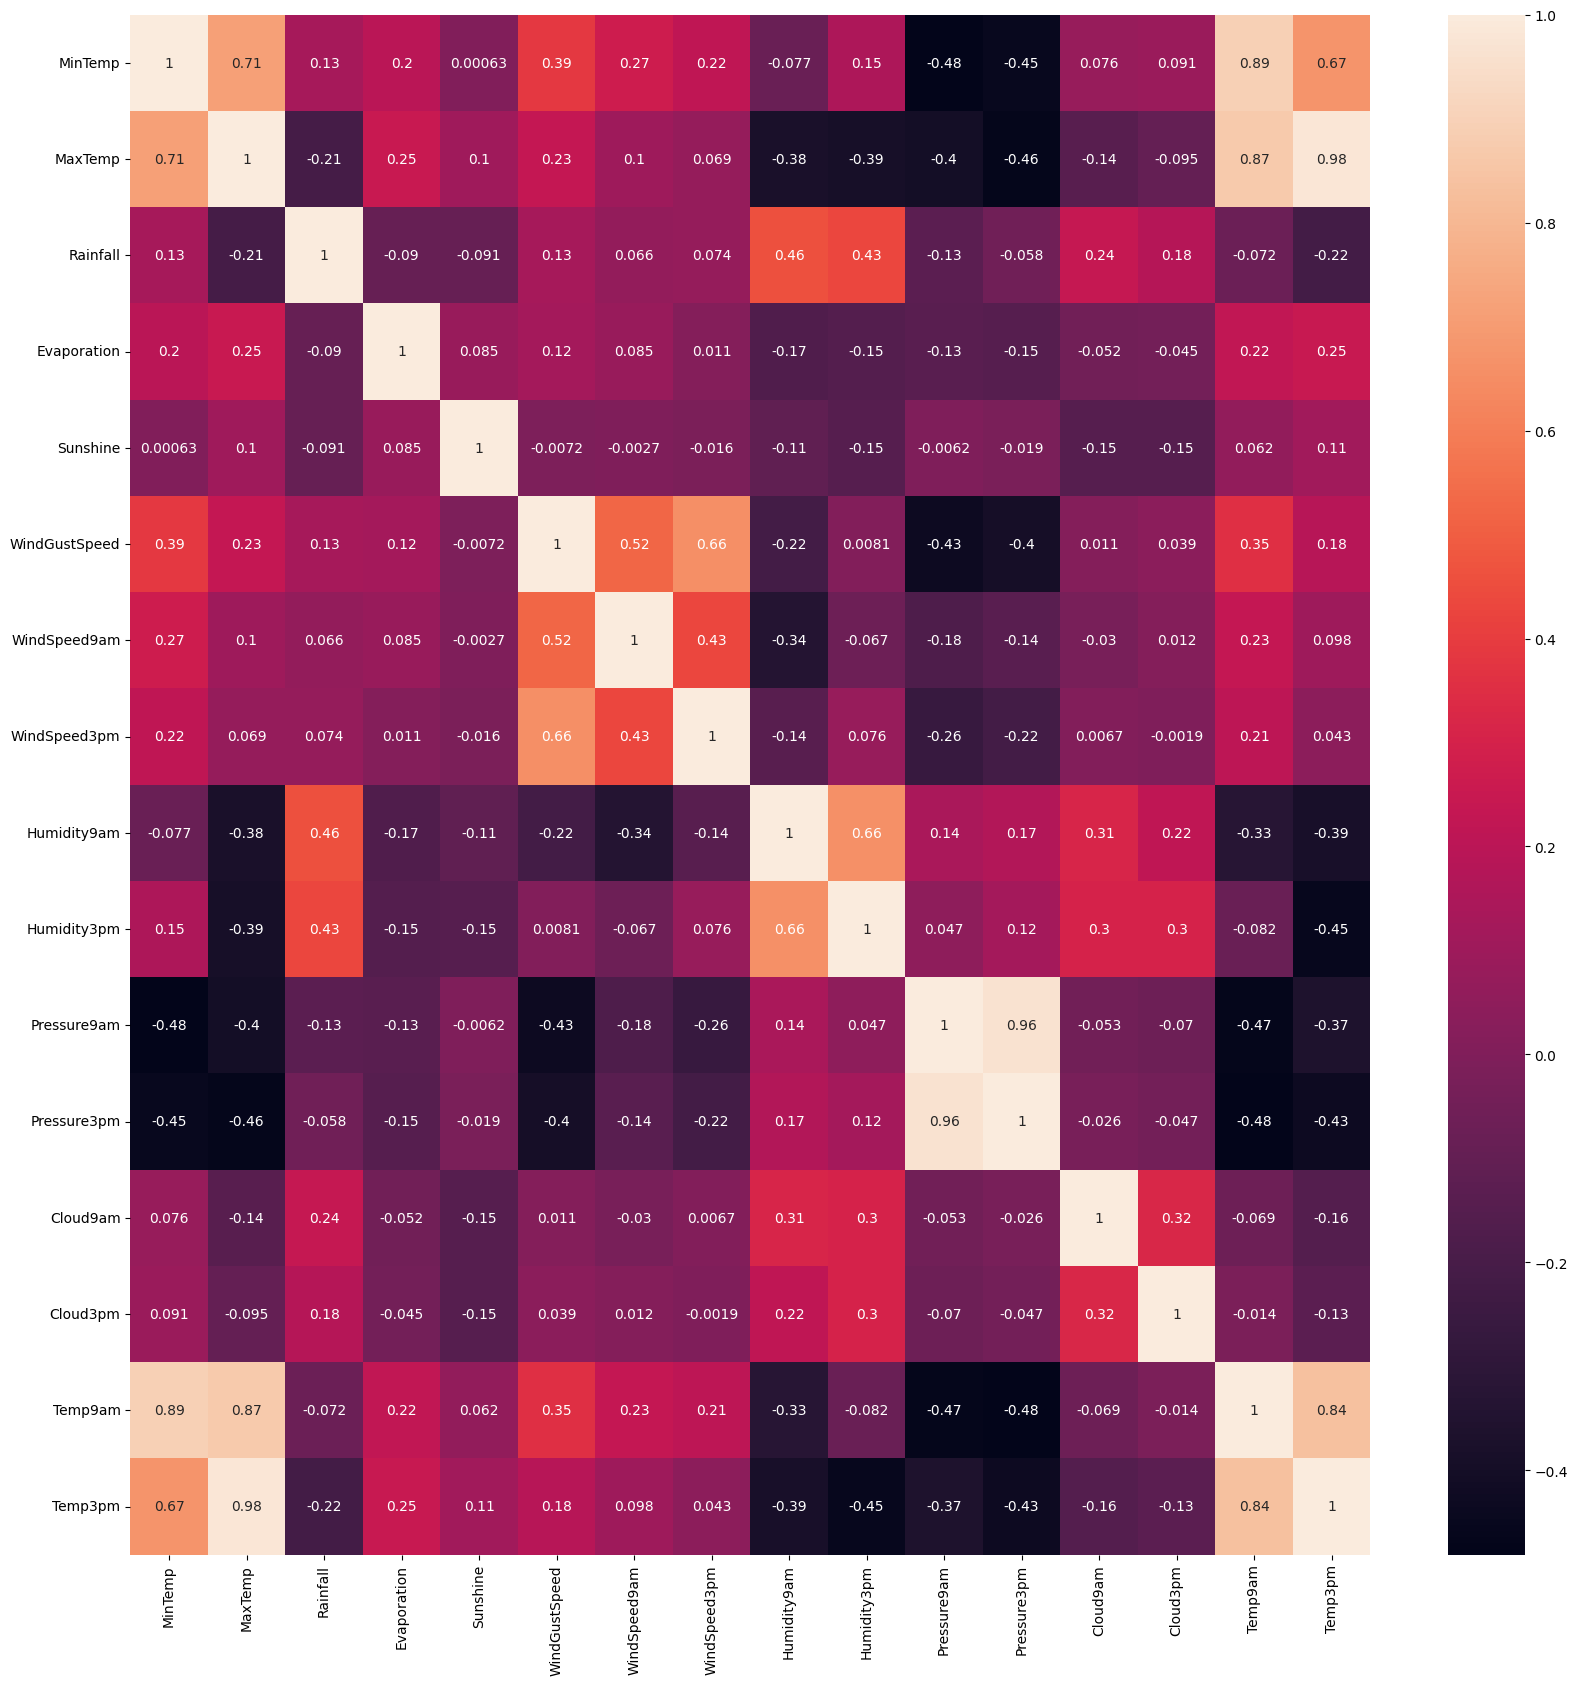

In [18]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


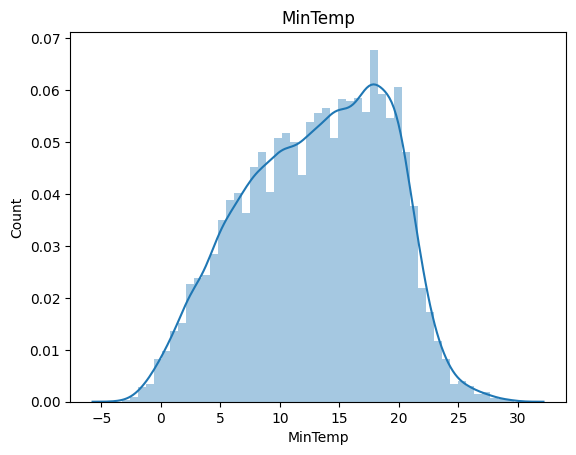

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


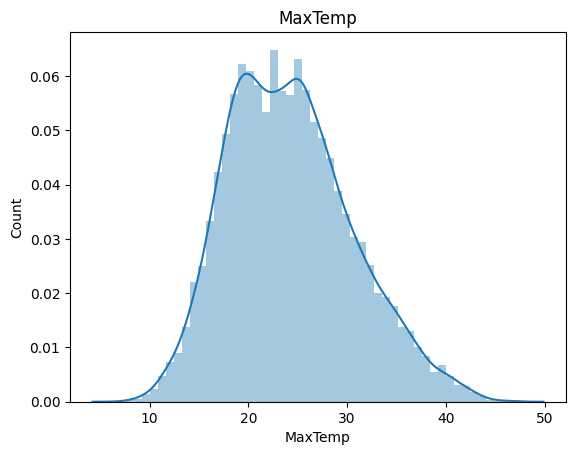

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


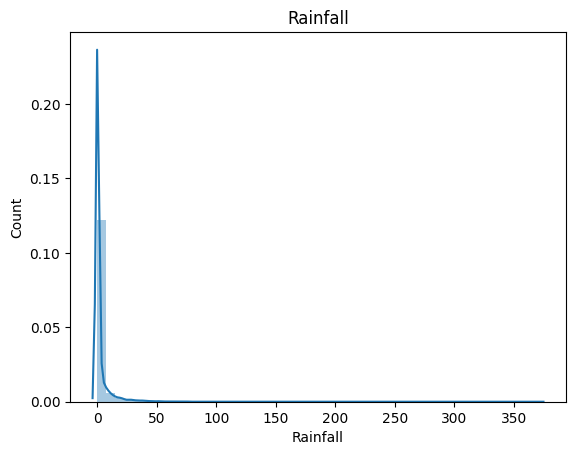

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


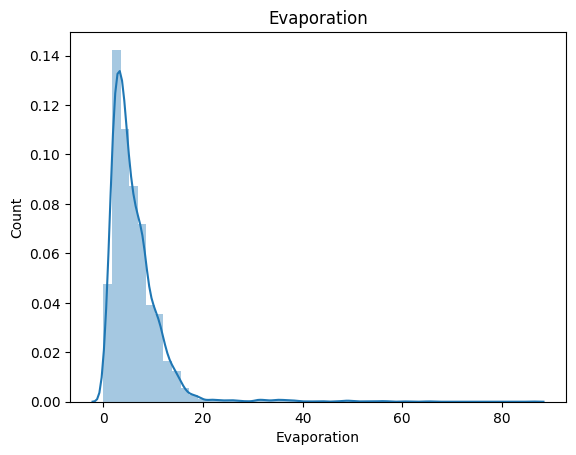

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


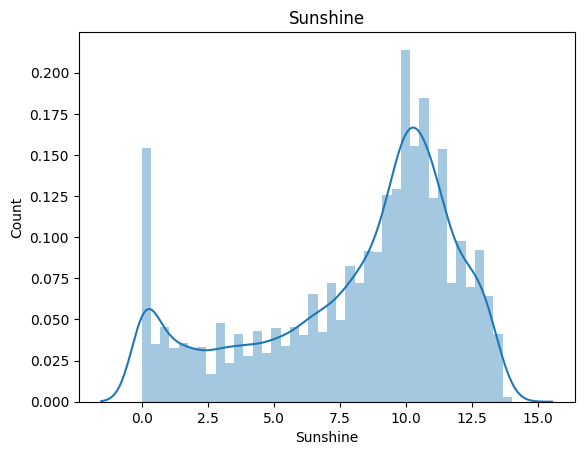

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


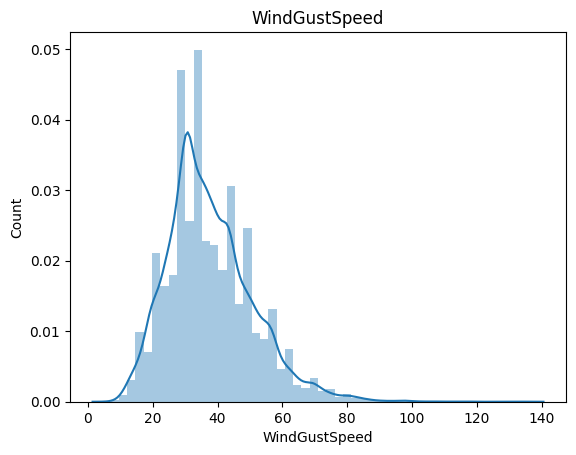

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


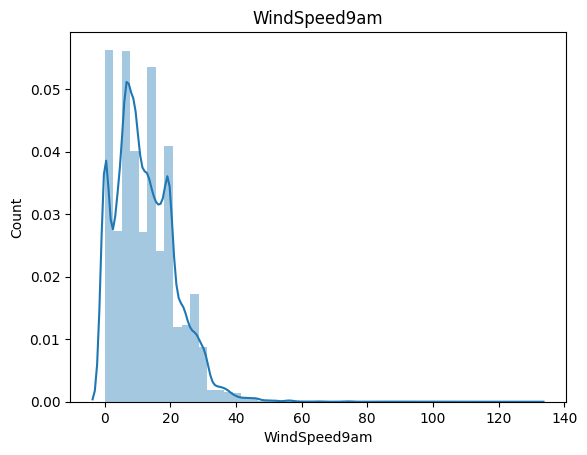

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


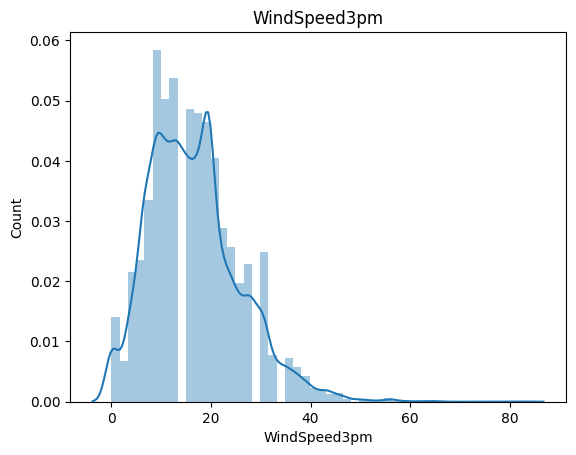

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


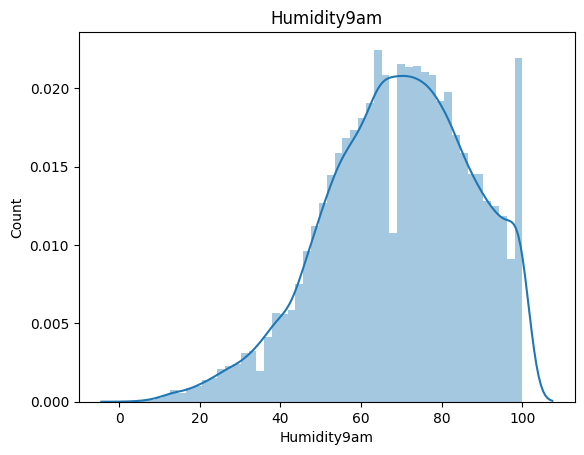

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


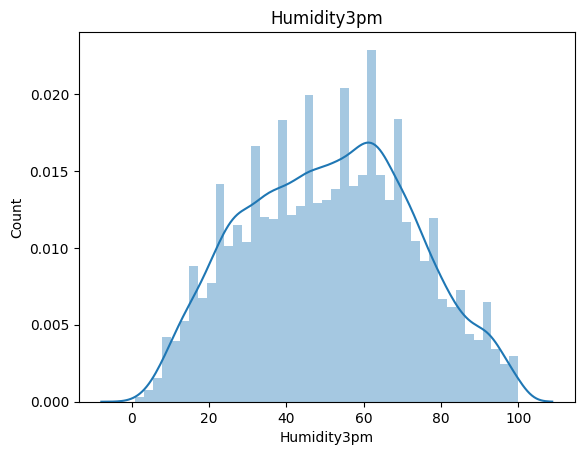

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


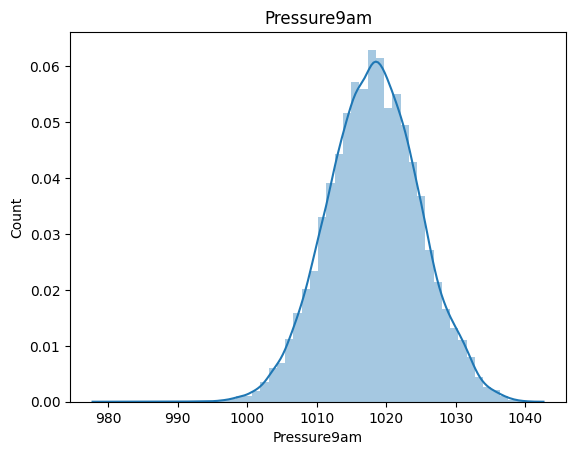

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


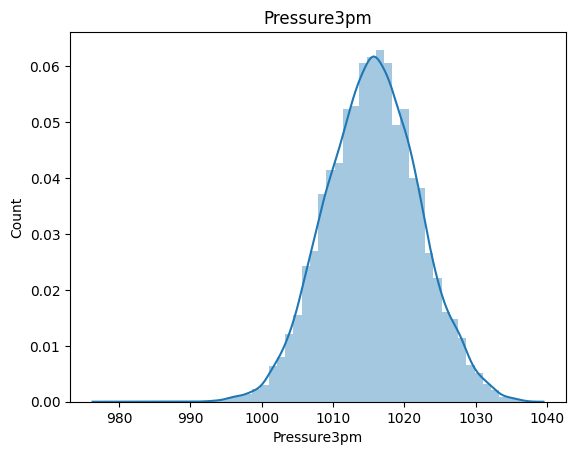

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


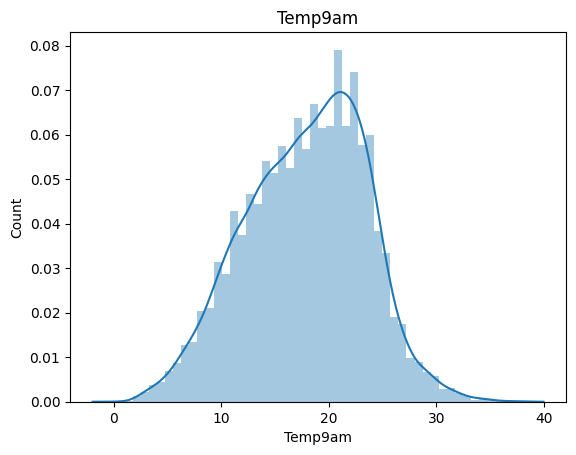

<Figure size 1500x1500 with 0 Axes>

<ipython-input-19-f3f36df57cc9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


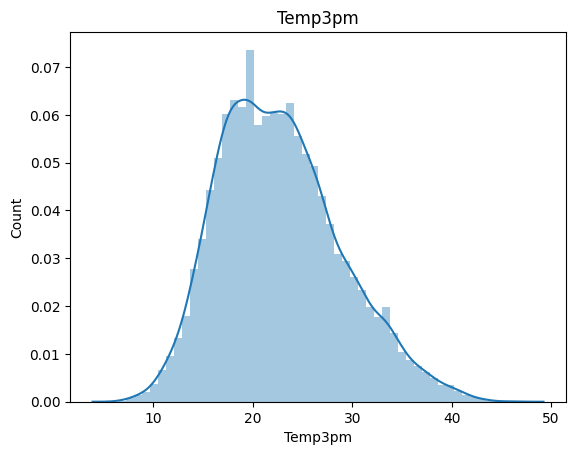

<Figure size 1500x1500 with 0 Axes>

In [19]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

##A 'for' loop is used to plot a boxplot for all the continuous features to see the outliers

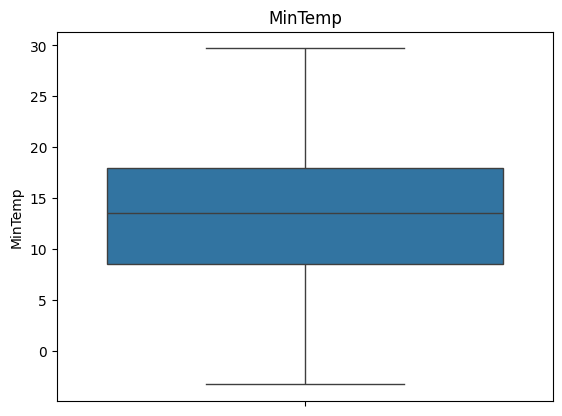

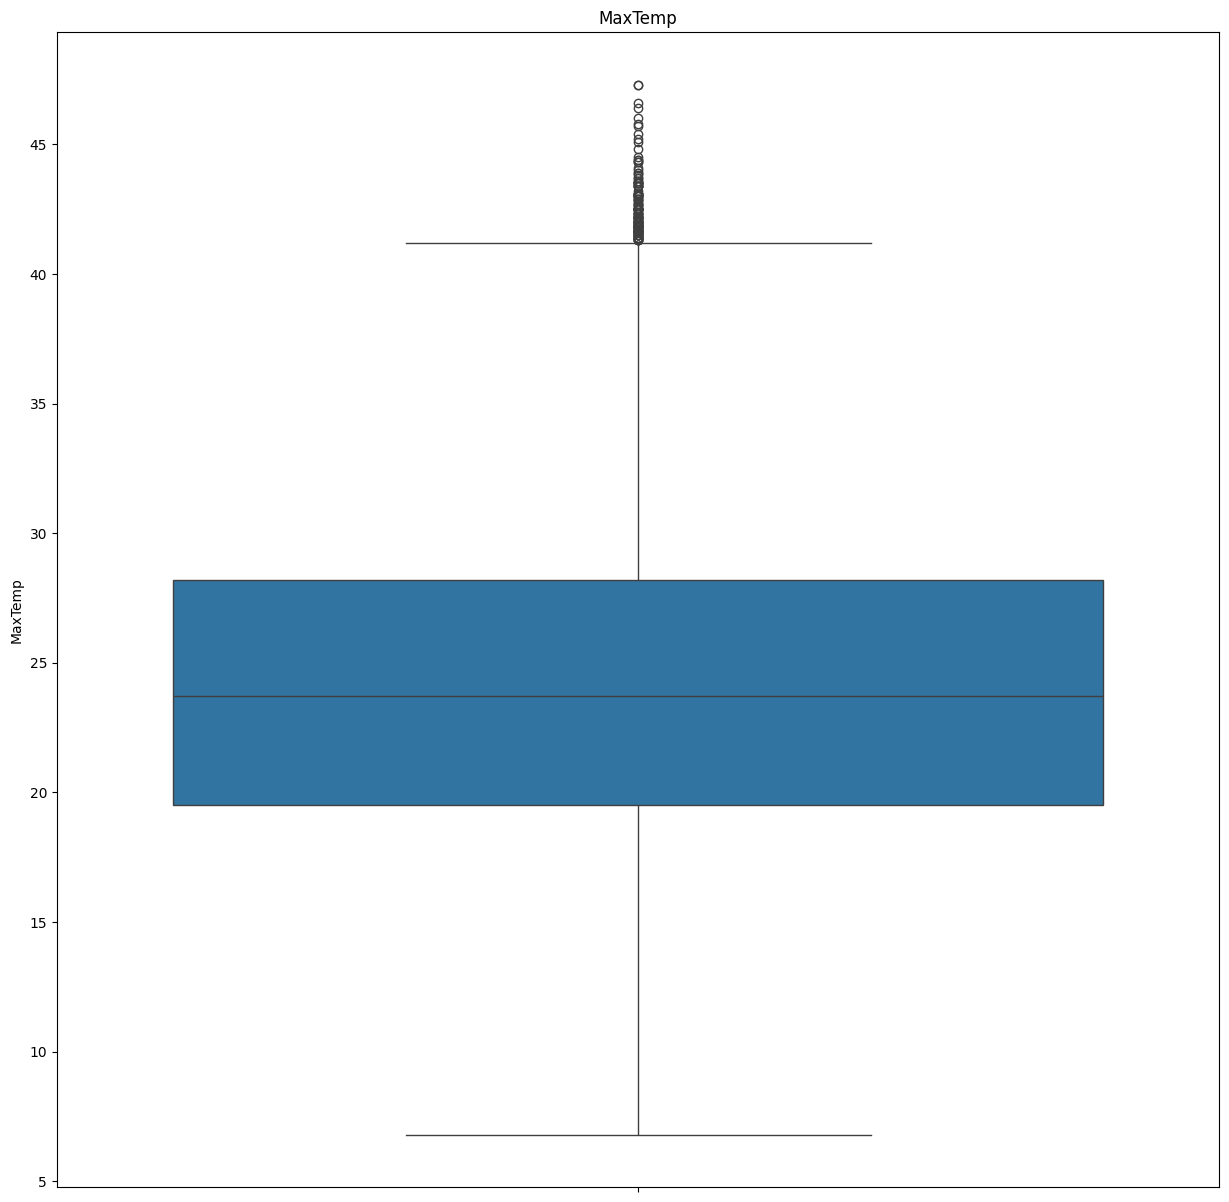

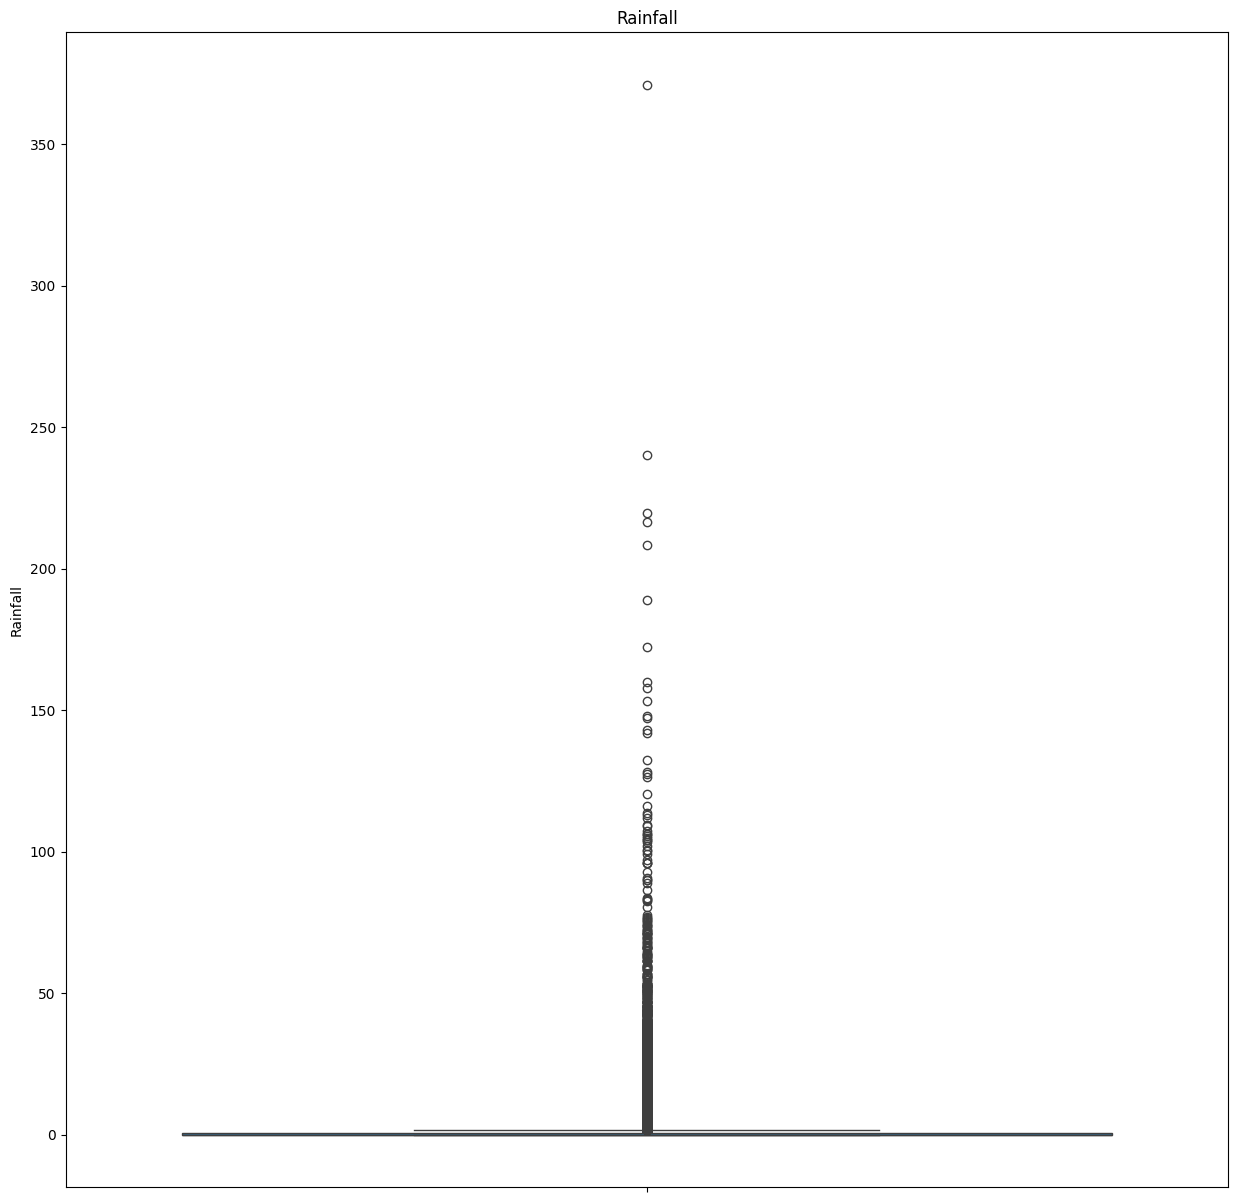

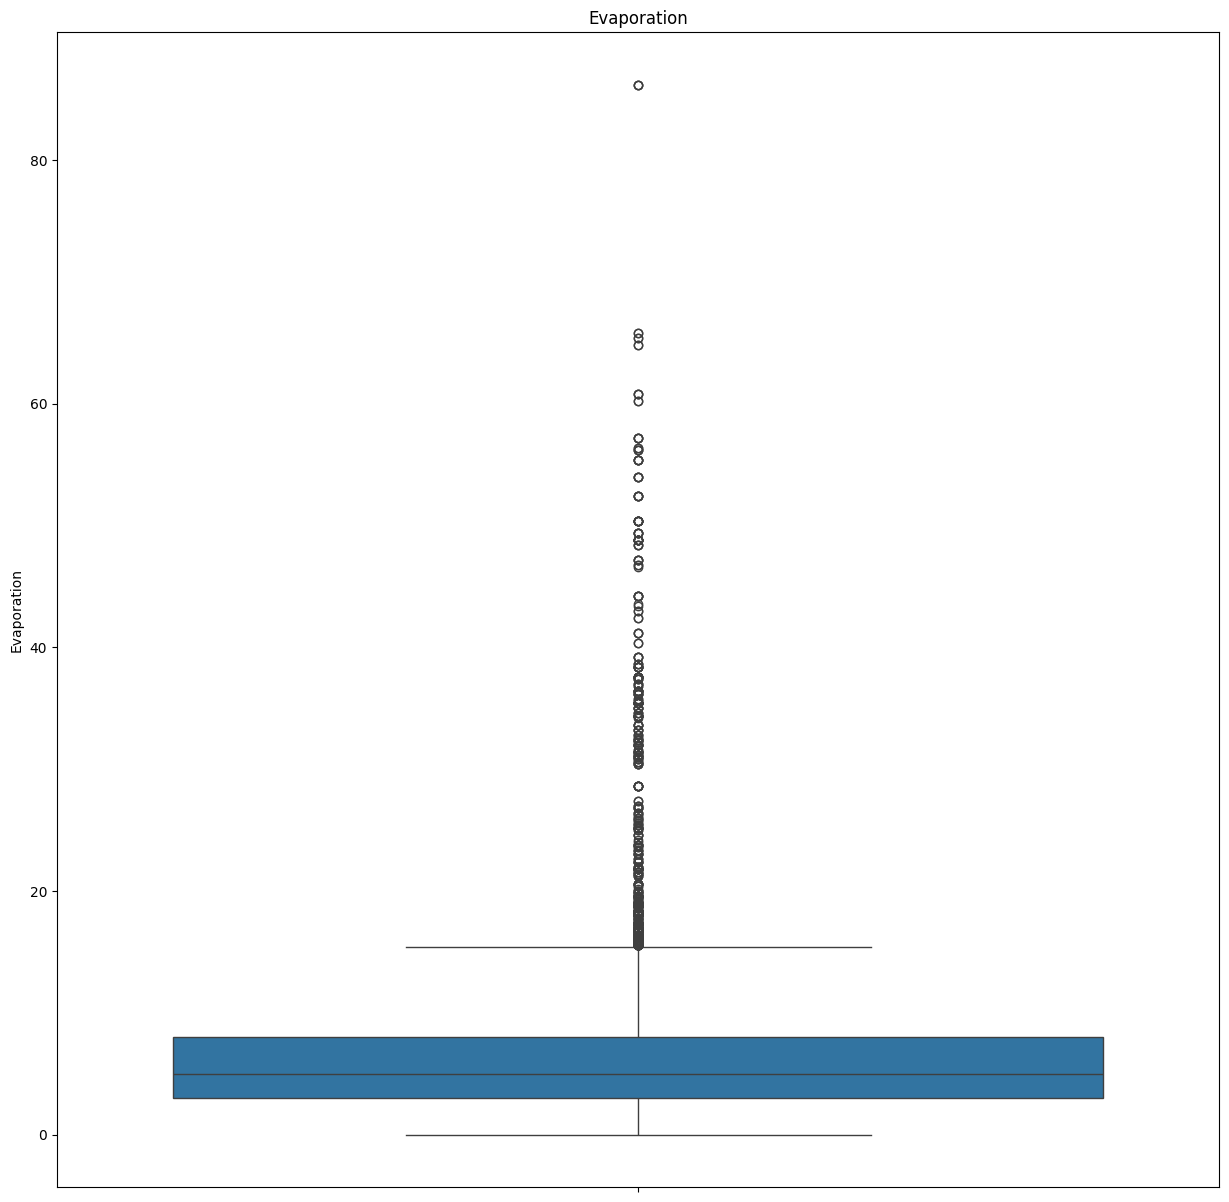

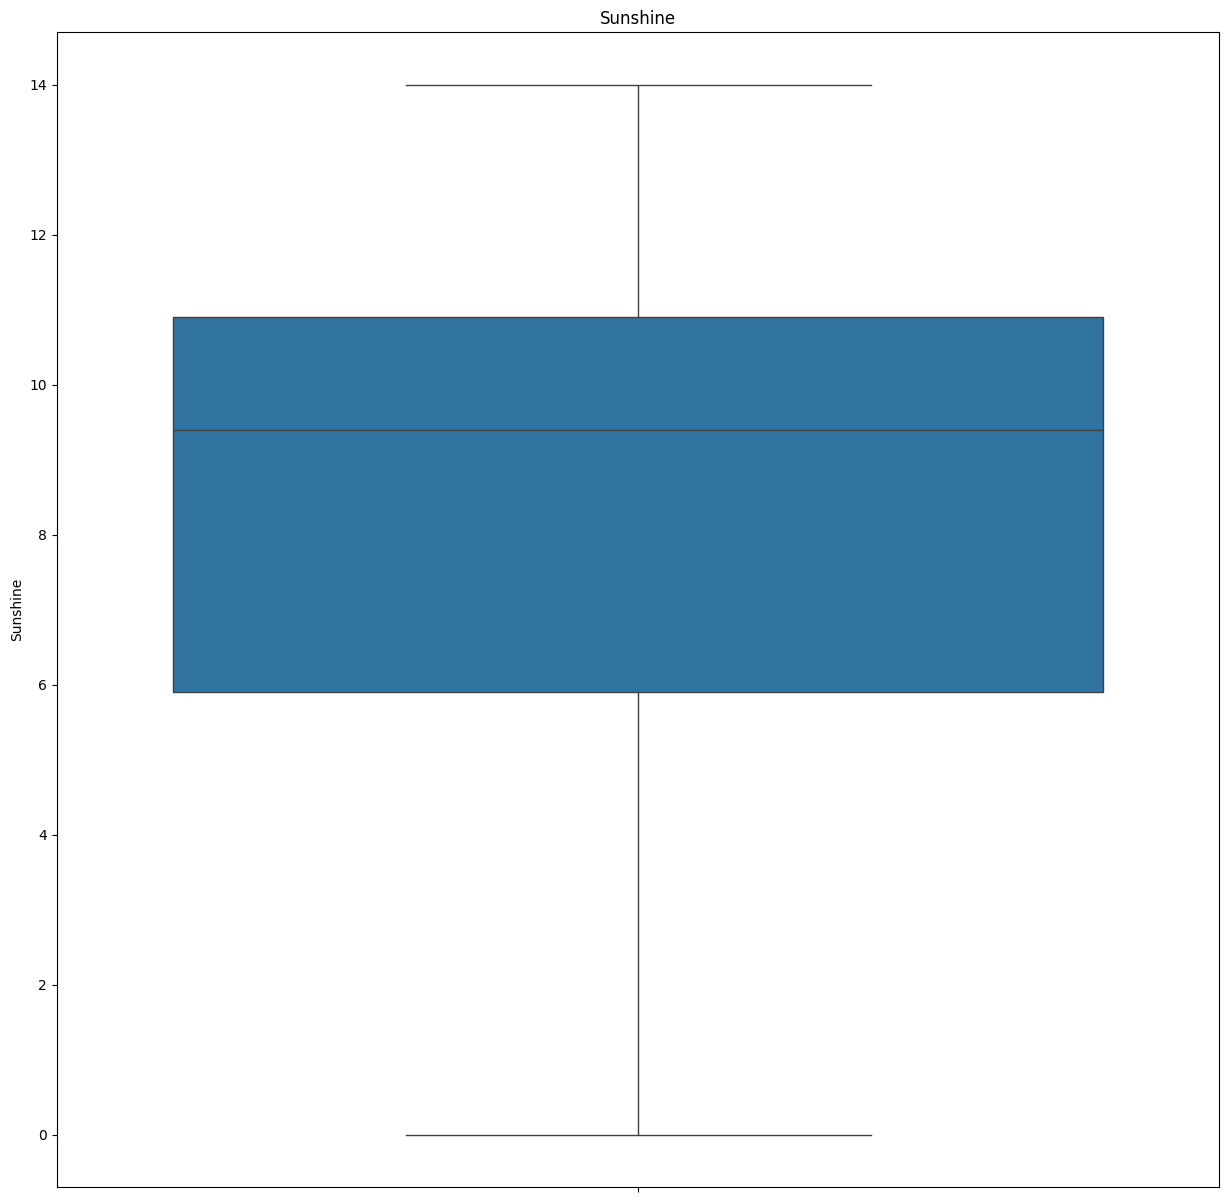

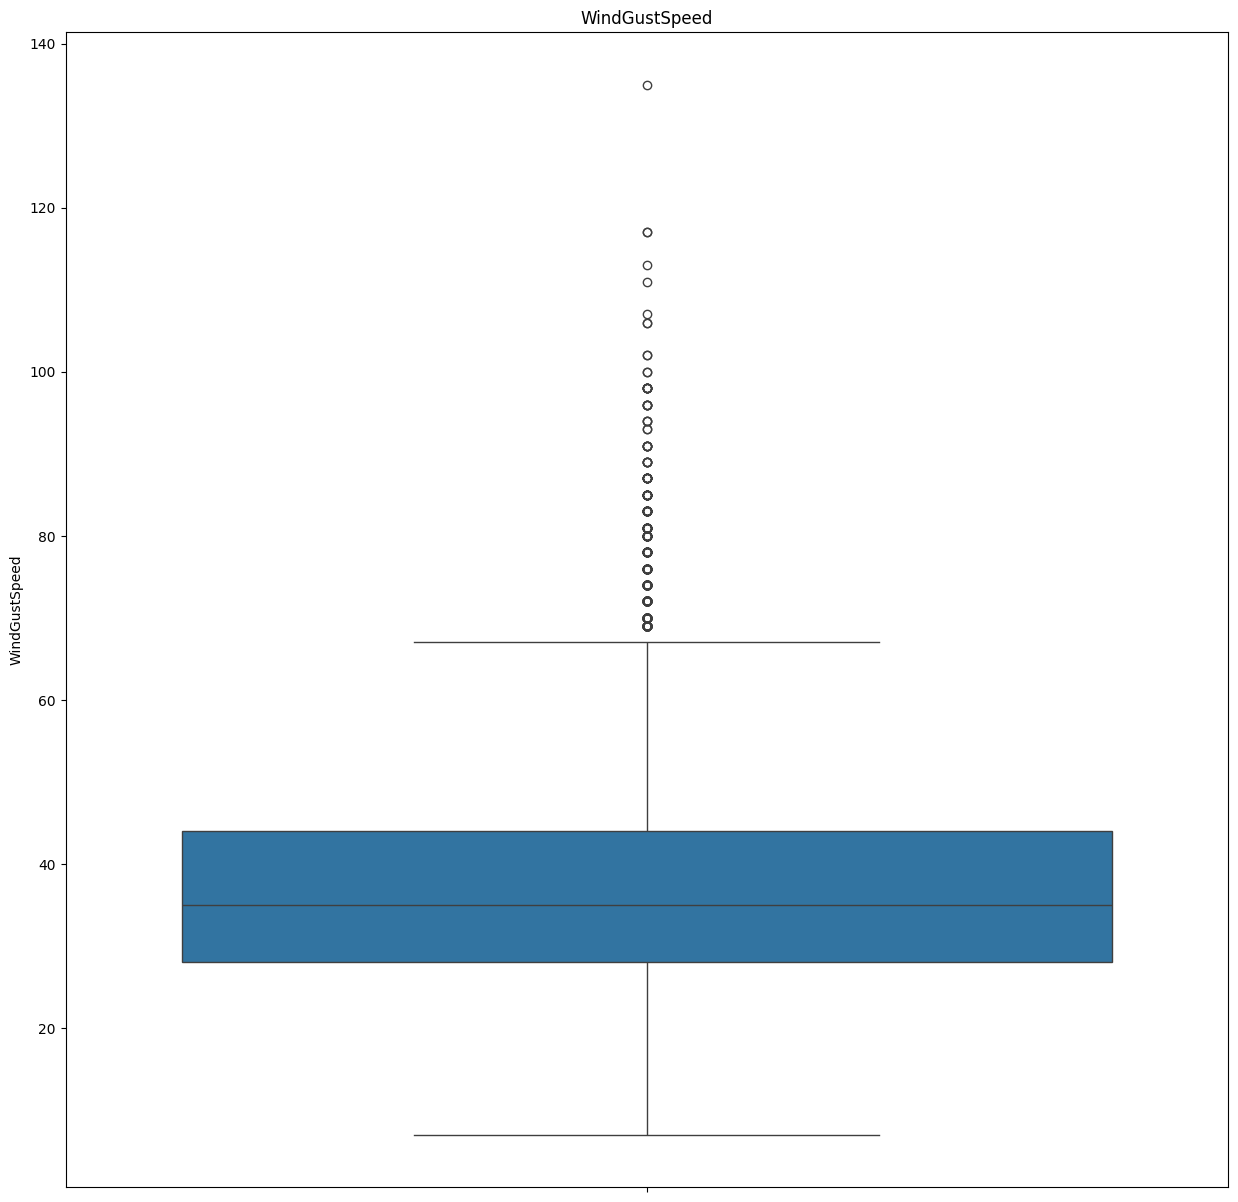

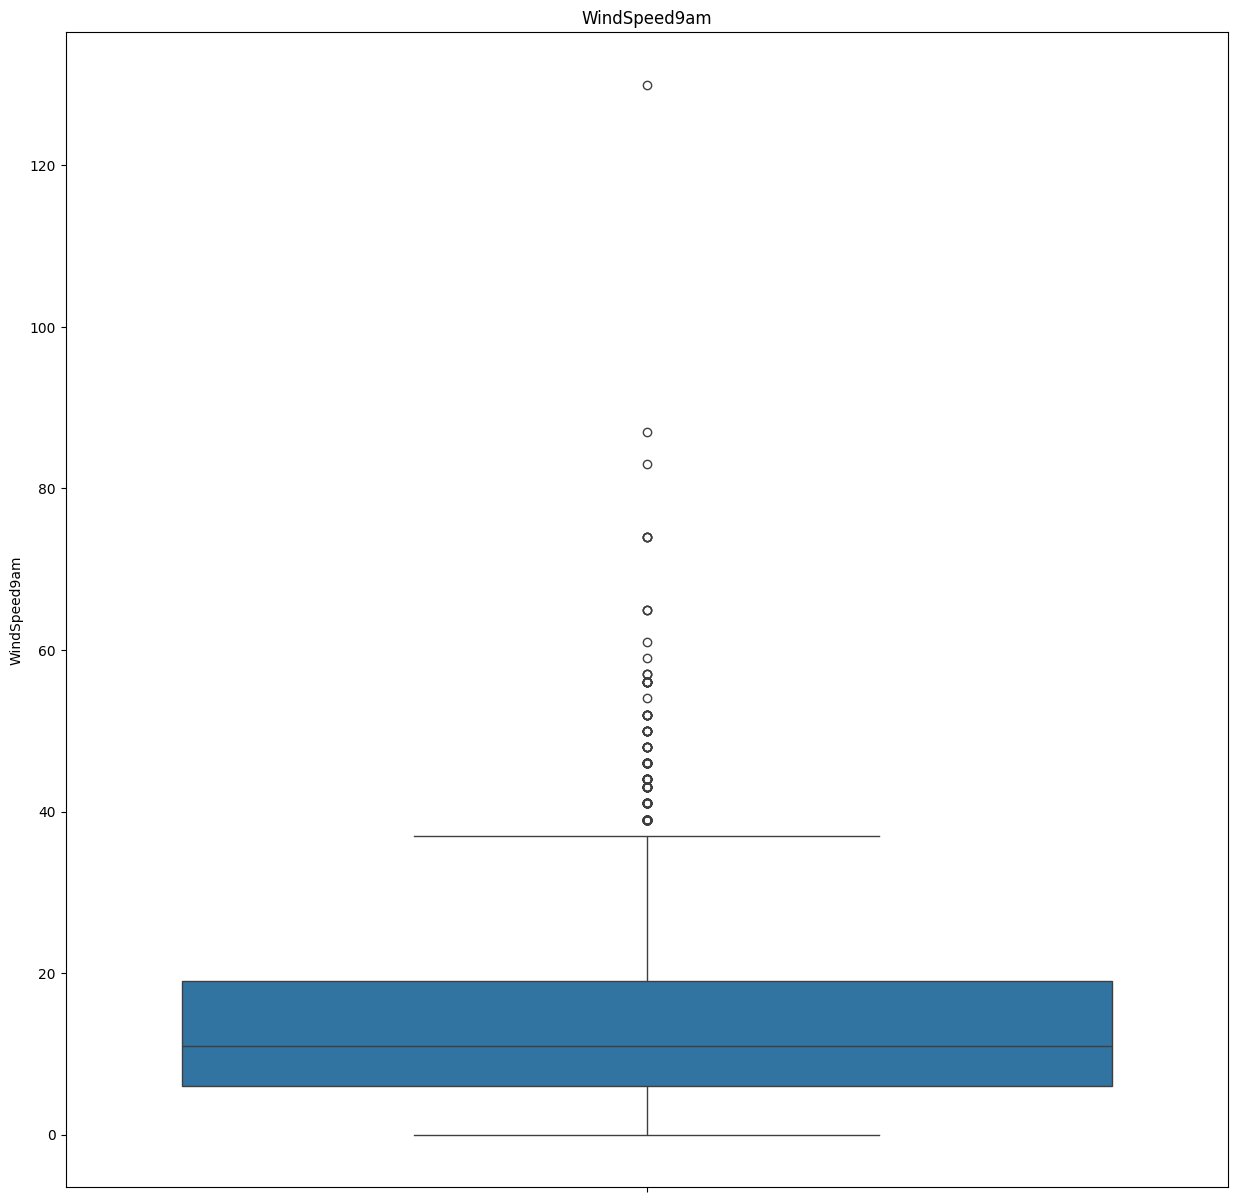

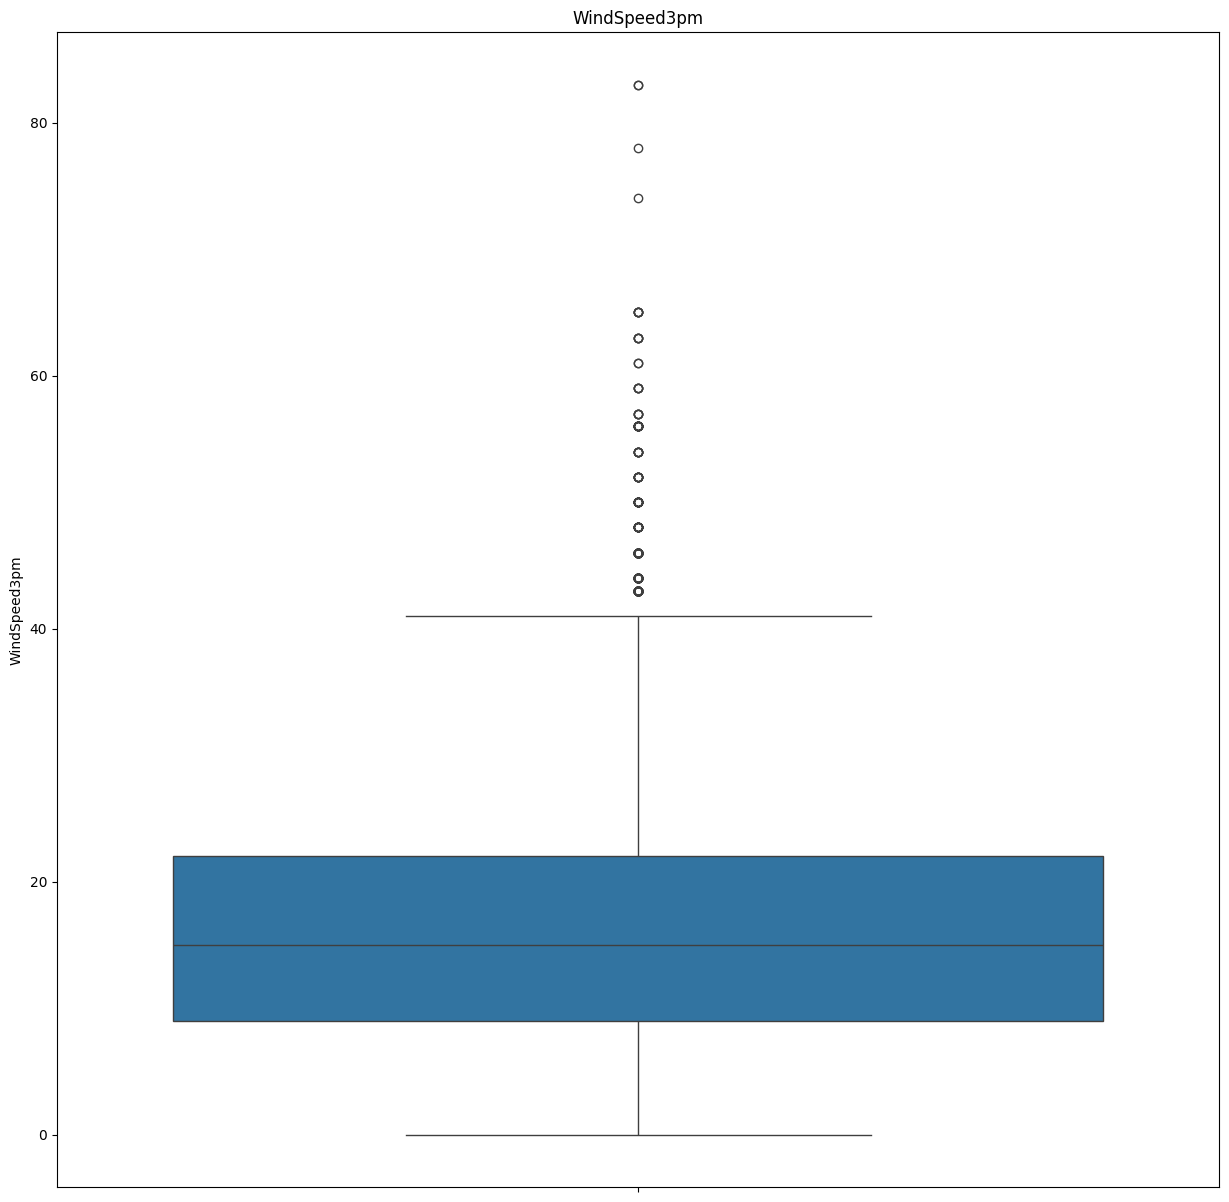

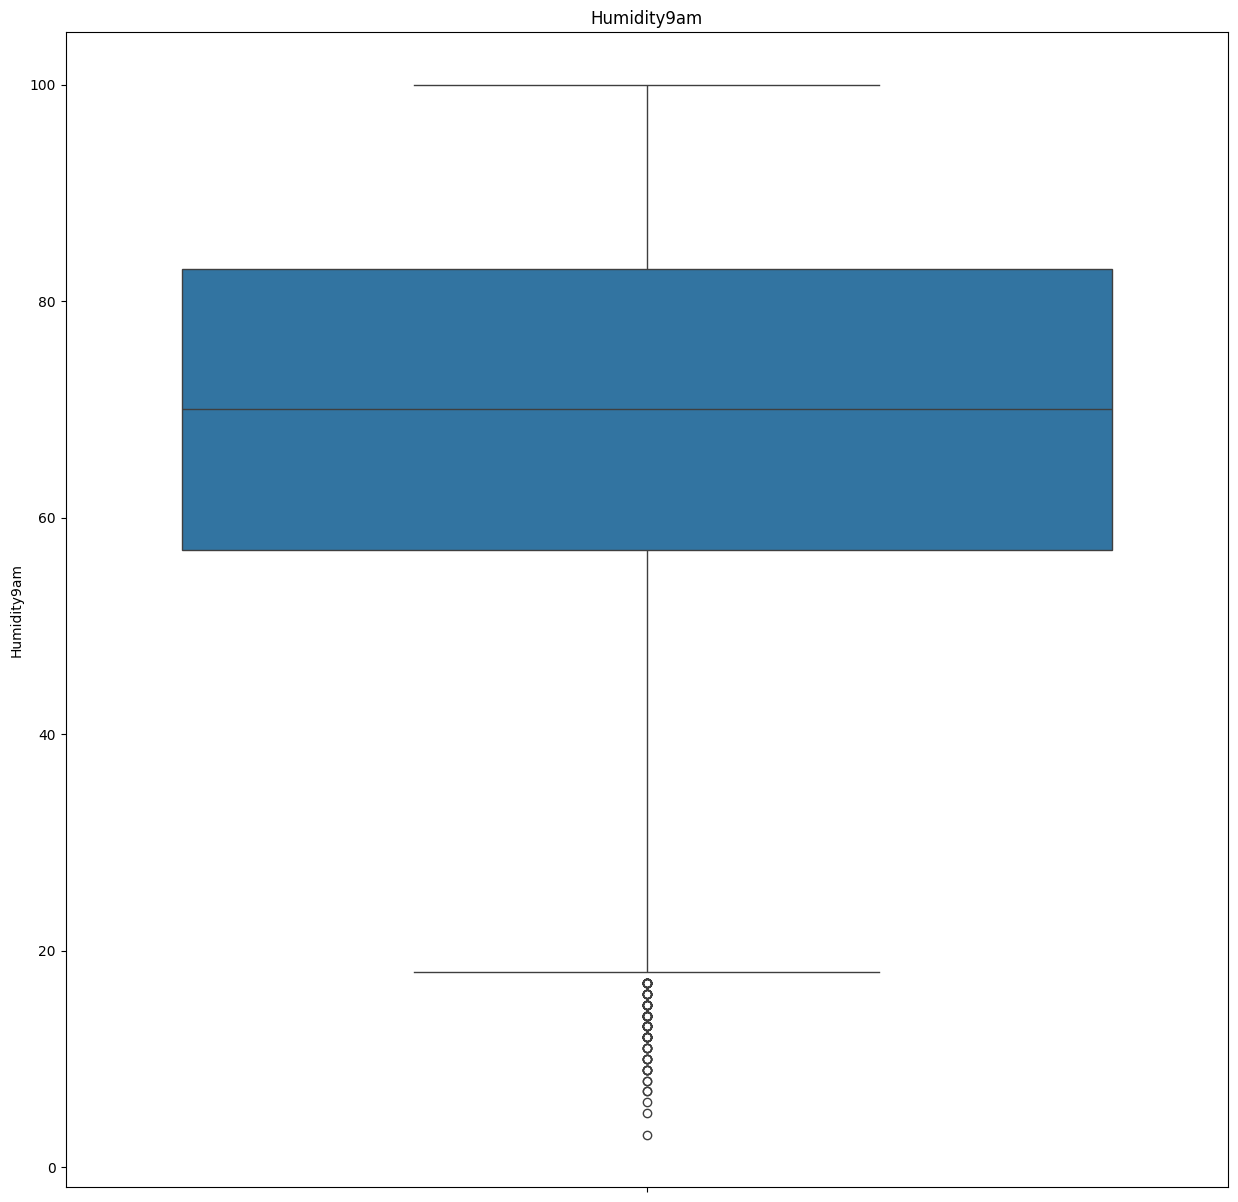

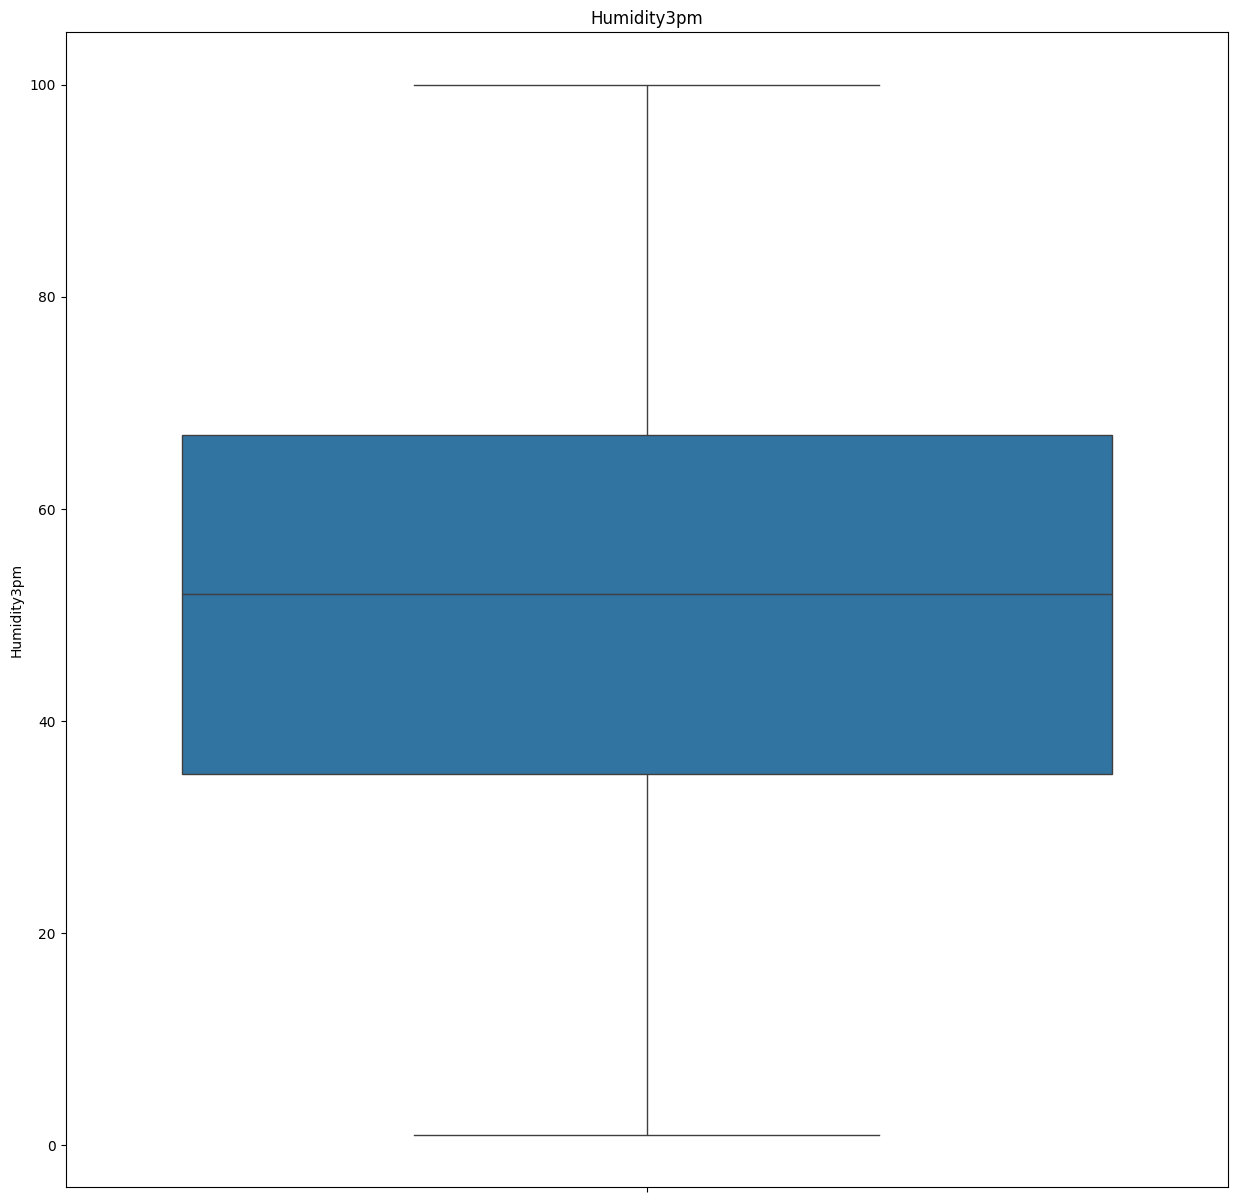

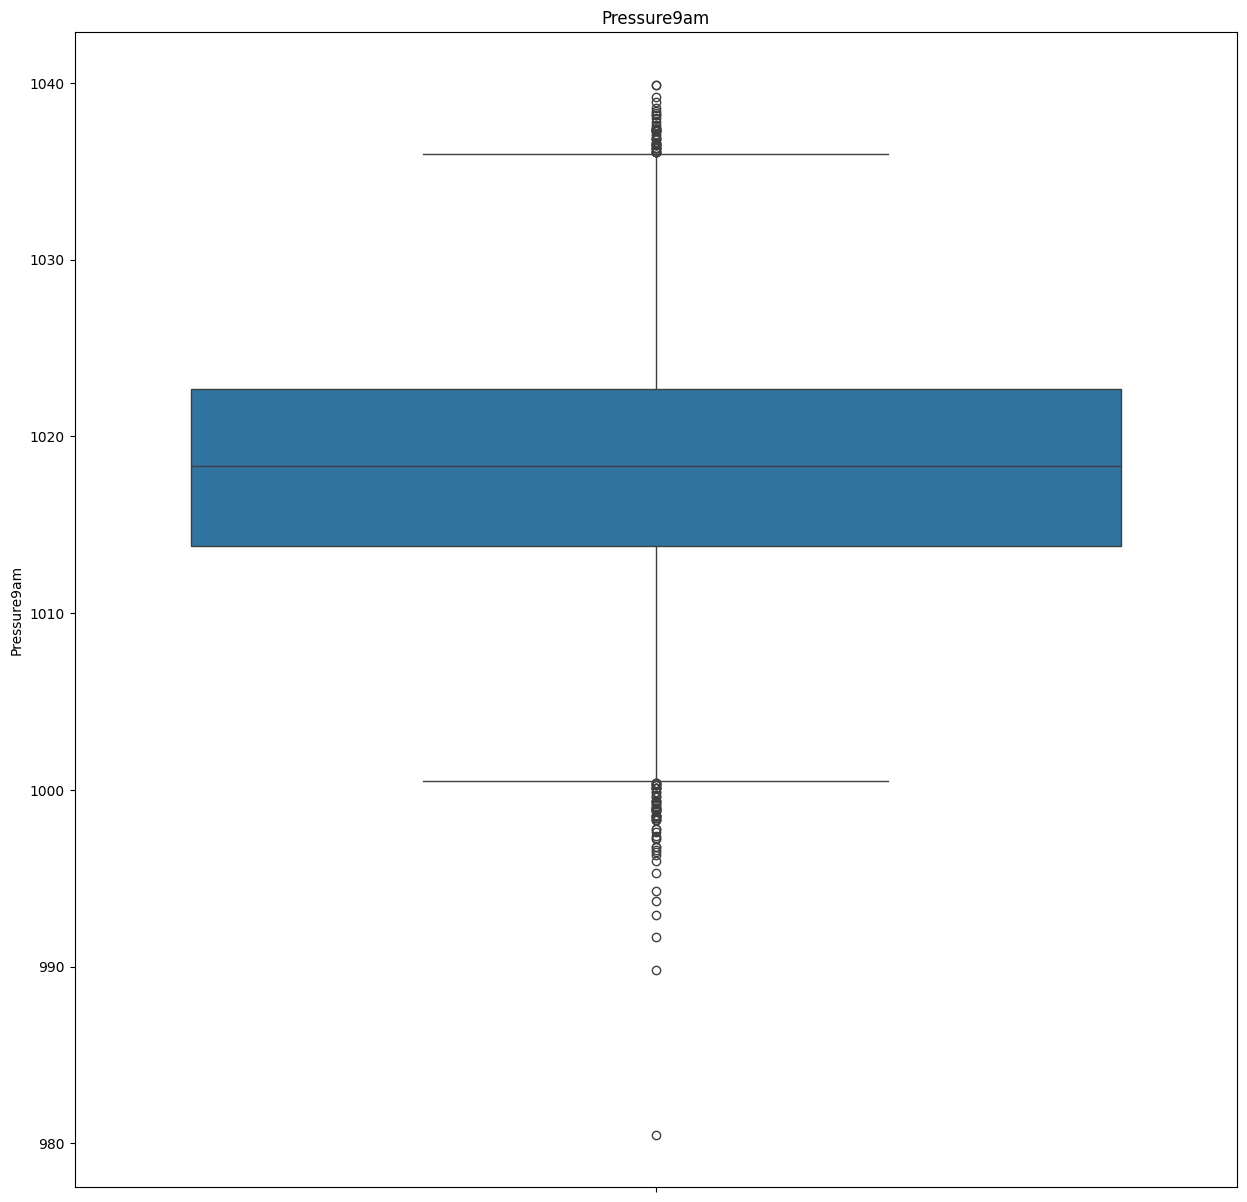

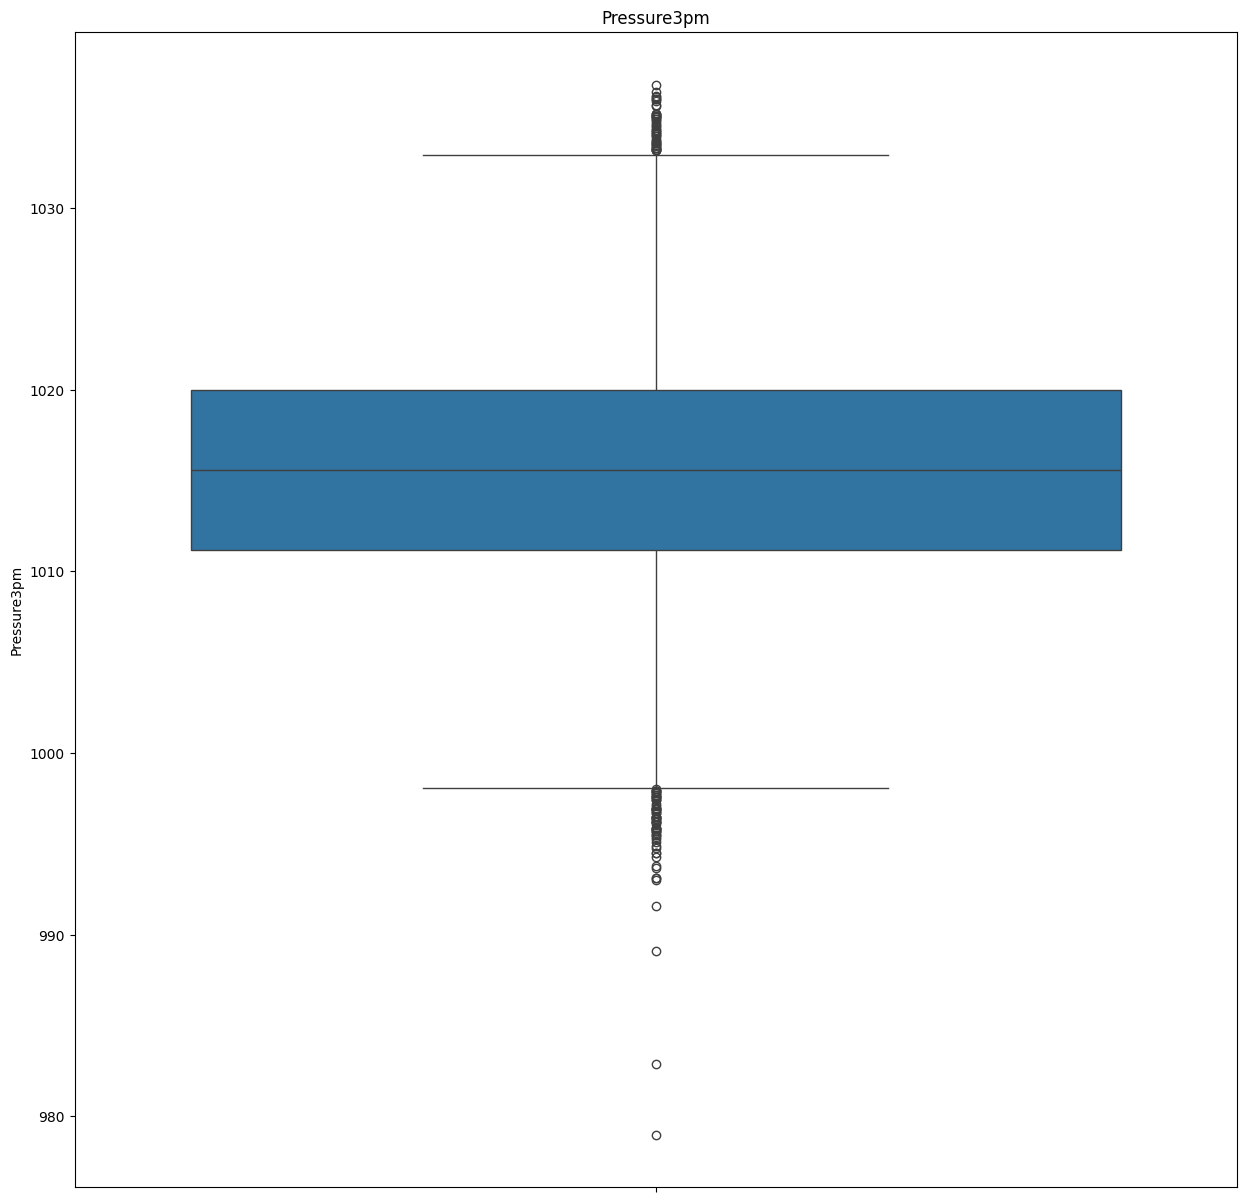

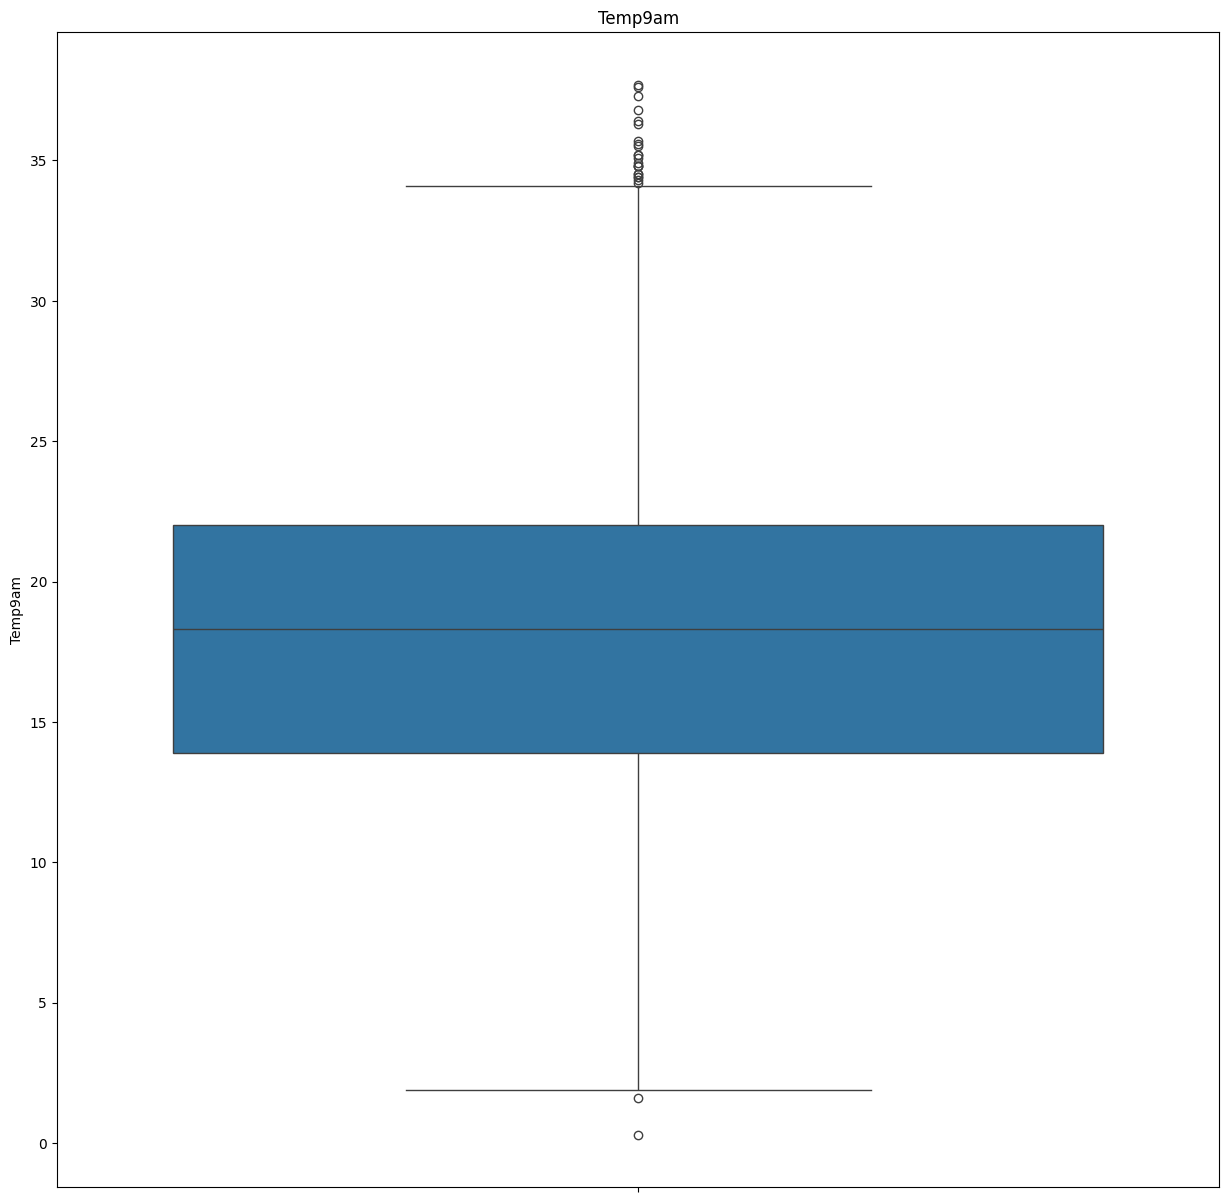

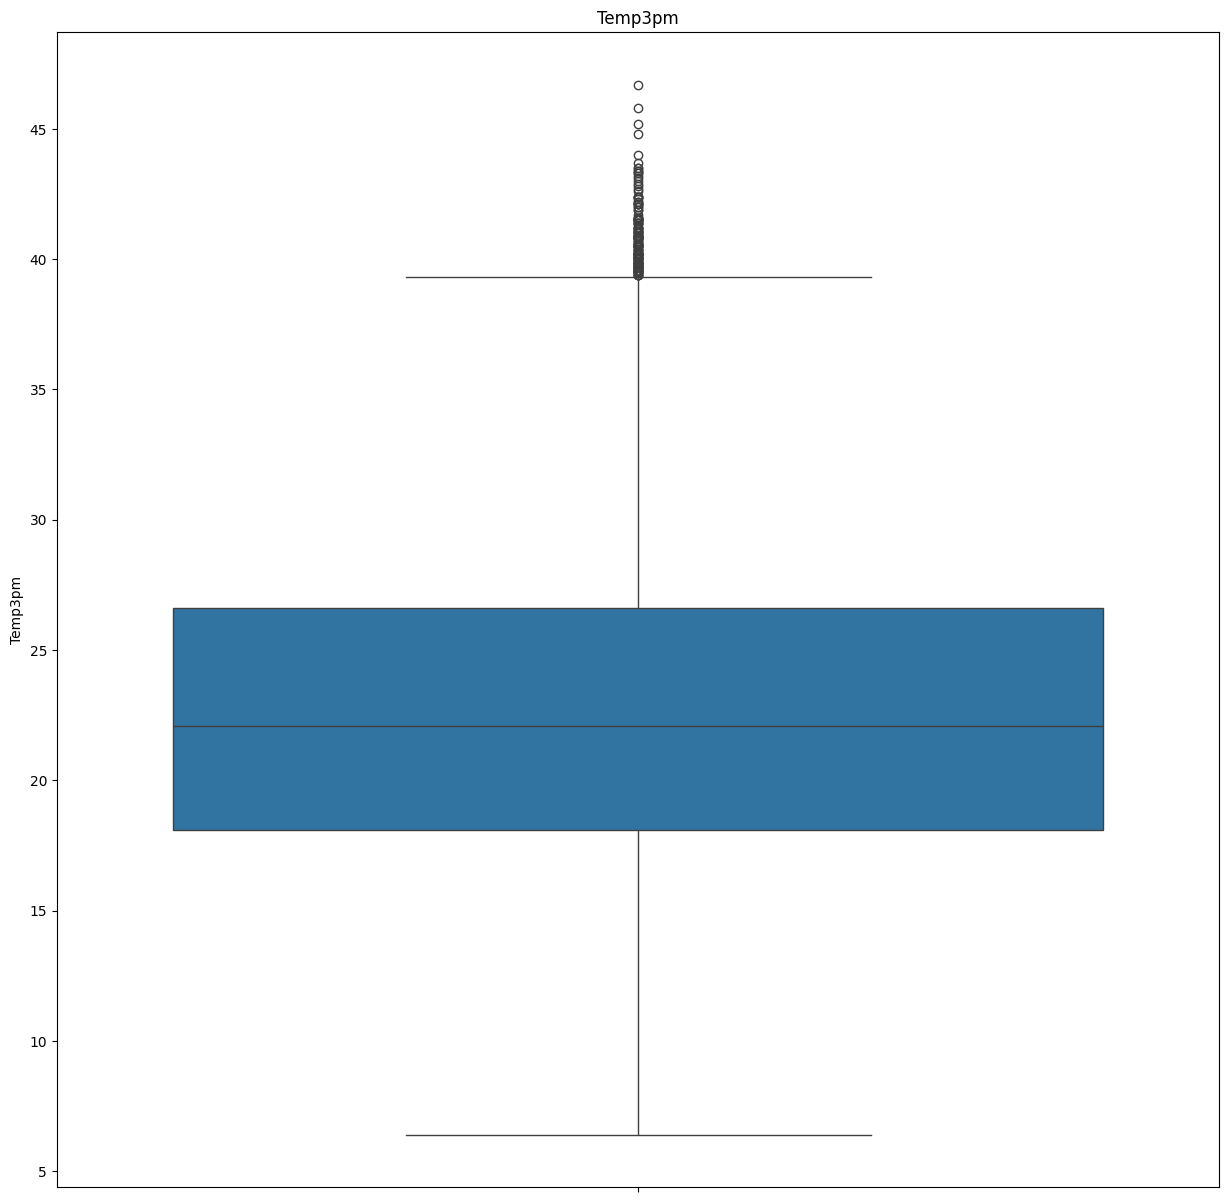

<Figure size 1500x1500 with 0 Axes>

In [20]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

##Filling null values with median of that feature column

In [21]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [22]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir      16.821918
WindGustSpeed     0.000000
WindDir9am       13.611872
WindDir3pm        8.552511
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.292237
RainTomorrow      2.292237
dtype: float64

In [23]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [24]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

##Creating dummies for specific categories

In [25]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.8,10.2,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.2,9.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,7.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,18.4,10.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.8,10.3,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,6.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.8,11.1,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,2011-02-16,NorfolkIsland,21.9,26.1,0.0,6.4,8.2,ESE,46.0,ESE,ESE,24.0,28.0,75.0,69.0,1018.2,1016.4,7.0,6.0,24.2,25.6,0,0
21896,2011-02-17,NorfolkIsland,22.0,27.0,0.0,4.0,4.0,ESE,48.0,ESE,ESE,20.0,28.0,79.0,82.0,1015.9,1014.3,7.0,7.0,25.4,25.0,0,1
21897,2011-02-18,NorfolkIsland,22.9,28.0,3.4,3.8,2.0,ENE,37.0,E,ENE,17.0,26.0,89.0,77.0,1014.7,1014.0,7.0,7.0,25.1,27.0,1,1
21898,2011-02-19,NorfolkIsland,22.2,26.9,4.2,5.2,10.7,E,43.0,E,ESE,26.0,30.0,80.0,69.0,1015.9,1014.5,4.0,6.0,25.2,25.2,1,0


In [26]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2012-06-02', '2008-12-18', '2016-06-04', '2016-06-03', '2013-09-16',
       '2011-11-24', '2015-11-04', '2015-06-16', '2008-12-29', '2014-03-26',
       ...
       '2013-09-04', '2013-09-03', '2013-09-02', '2013-08-31', '2013-08-30',
       '2013-08-27', '2013-08-26', '2013-08-25', '2013-08-24', '2013-04-28'],
      dtype='object', name='Date', length=3040)
Location Index(['CoffsHarbour', 'NorahHead', 'NorfolkIsland', 'Newcastle', 'Albury',
       'BadgerysCreek', 'Moree', 'Cobar'],
      dtype='object', name='Location')
WindGustDir Index(['S', 'SSE', 'N', 'ESE', 'SSW', 'NNW', 'NW', 'SE', 'NNE', 'ENE', 'NE',
       'WNW', 'W', 'SW', 'WSW', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['SW', 'WSW', 'NNW', 'SSW', 'SE', 'NNE', 'NE', 'ENE', 'N', 'ESE', 'NW',
       'WNW', 'S', 'W', 'E', 'SSE'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['SSW', 'S', 'N', 'NNW', 'SSE', 'SE', 'NNE', 'E', 'NE', 'ESE', 'ENE',
       'NW', 'SW', 'WNW', 'WSW', 'W']

In [27]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [28]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [29]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [30]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [31]:
df1

RainTomorrow,0,1
Location,,
Albury,2422,618
BadgerysCreek,2426,583
Cobar,2623,386
CoffsHarbour,2140,869
Moree,2615,394
Newcastle,2308,731
NorahHead,2196,808
NorfolkIsland,573,208


In [32]:
df1[1].sort_values(ascending = False)

Location
CoffsHarbour     869
NorahHead        808
Newcastle        731
Albury           618
BadgerysCreek    583
Moree            394
Cobar            386
NorfolkIsland    208
Name: 1, dtype: int64

In [33]:
df1[1].sort_values(ascending = False).index

Index(['CoffsHarbour', 'NorahHead', 'Newcastle', 'Albury', 'BadgerysCreek',
       'Moree', 'Cobar', 'NorfolkIsland'],
      dtype='object', name='Location')

In [34]:
len(df1[1].sort_values(ascending = False).index)

8

In [35]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [36]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [37]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [38]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,3.8,10.2,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.2,9.3,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.0,7.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,18.4,10.3,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,5.8,10.3,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,6.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.8,11.1,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,2011-02-16,6,21.9,26.1,0.0,6.4,8.2,13.0,46.0,14.0,15.0,24.0,28.0,75.0,69.0,1018.2,1016.4,7.0,6.0,24.2,25.6,0,0,2,16
21896,2011-02-17,6,22.0,27.0,0.0,4.0,4.0,13.0,48.0,14.0,15.0,20.0,28.0,79.0,82.0,1015.9,1014.3,7.0,7.0,25.4,25.0,0,1,2,17
21897,2011-02-18,6,22.9,28.0,3.4,3.8,2.0,14.0,37.0,15.0,13.0,17.0,26.0,89.0,77.0,1014.7,1014.0,7.0,7.0,25.1,27.0,1,1,2,18
21898,2011-02-19,6,22.2,26.9,4.2,5.2,10.7,15.0,43.0,15.0,15.0,26.0,30.0,80.0,69.0,1015.9,1014.5,4.0,6.0,25.2,25.2,1,0,2,19


<ipython-input-39-ada496408818>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


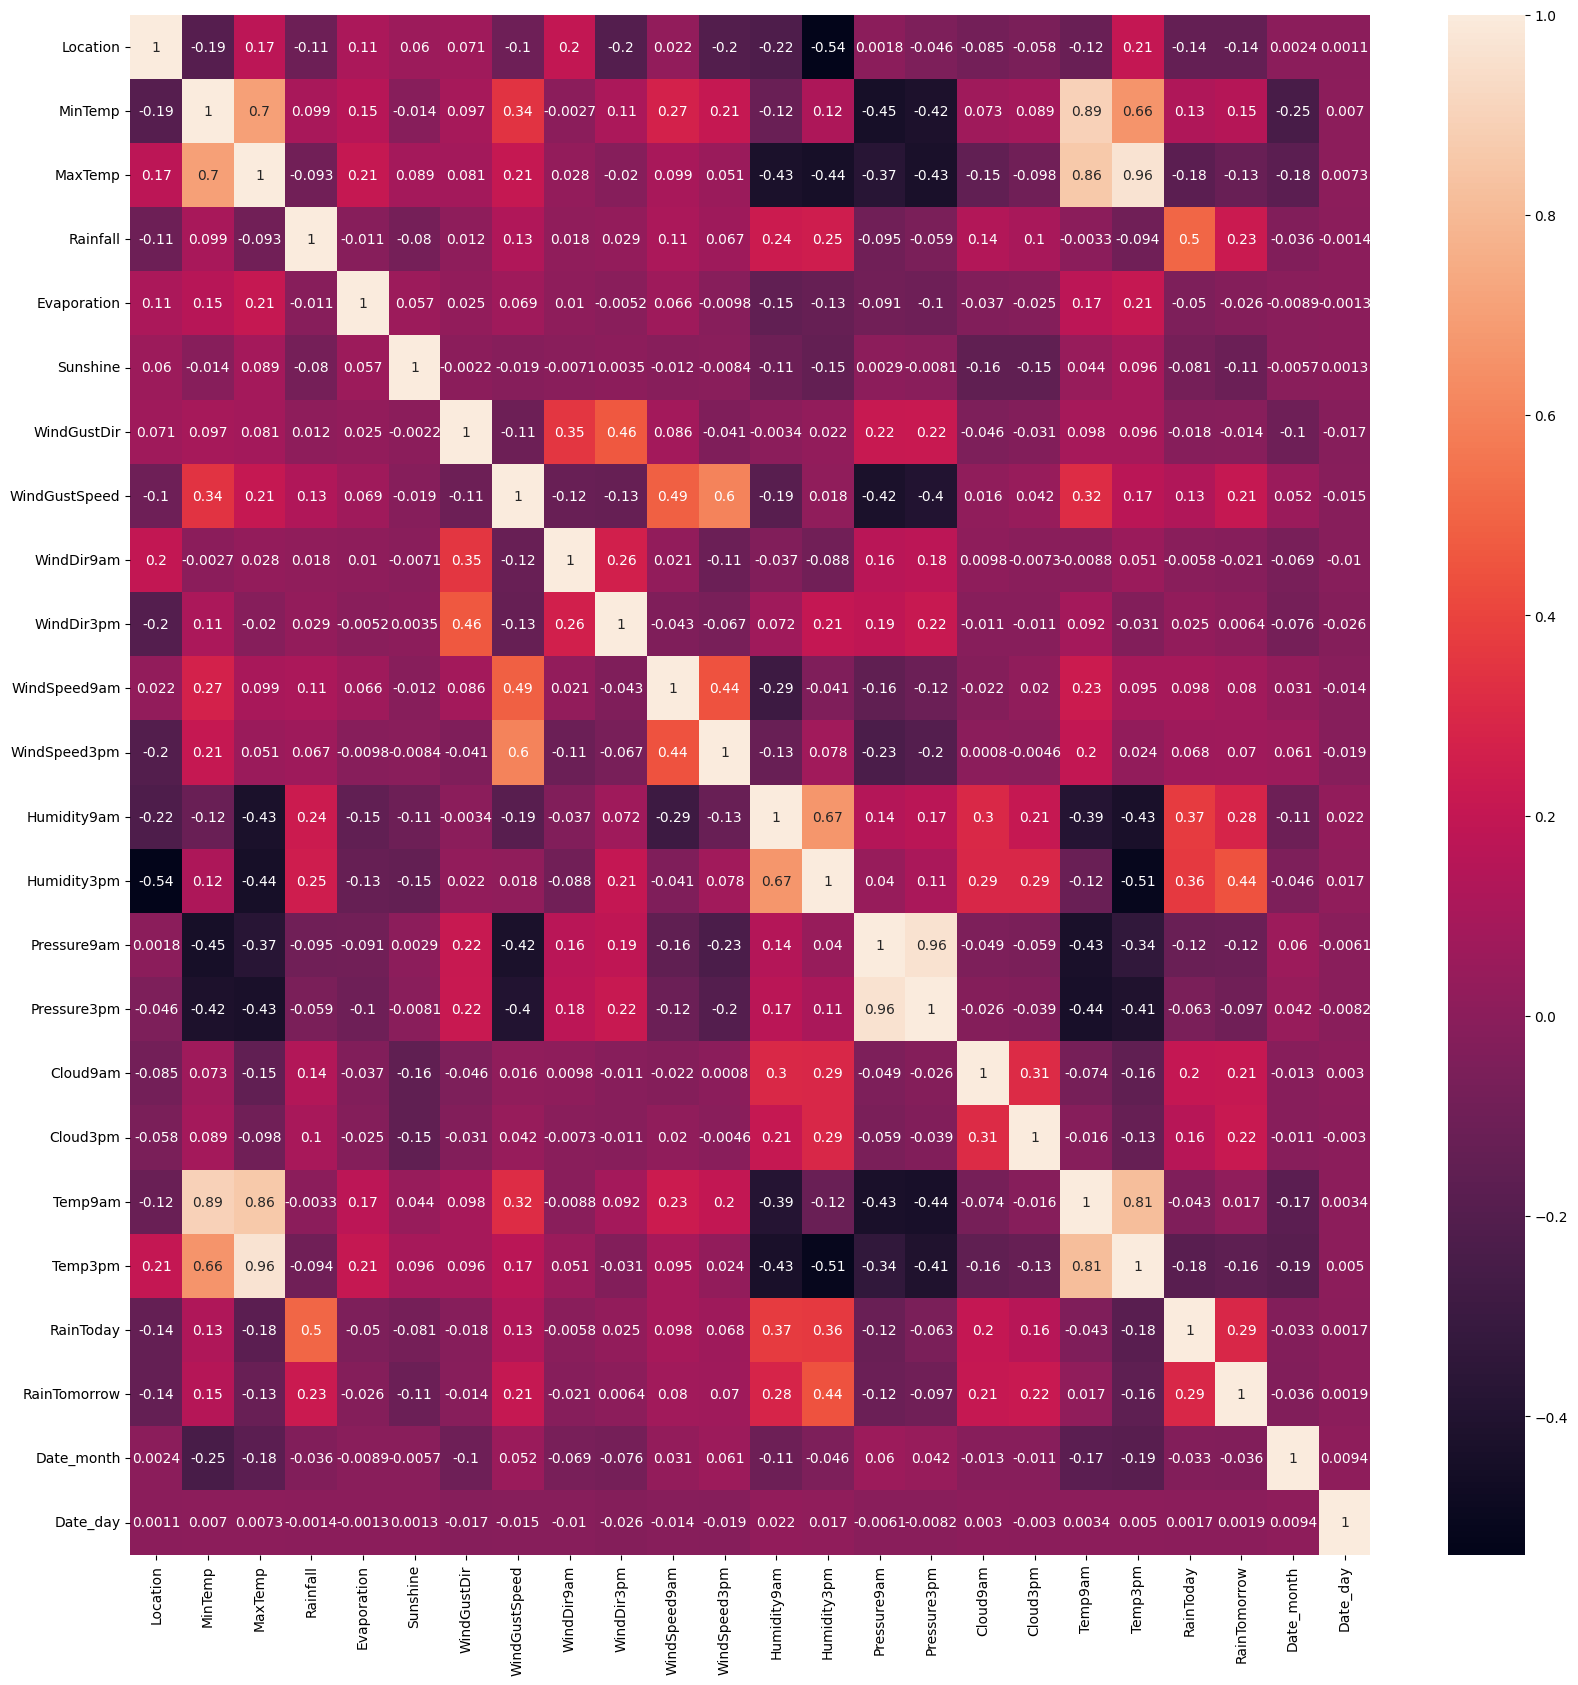

In [39]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [40]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.200000000000001 31.6


In [41]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [42]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.450000000000001 41.25


In [43]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [44]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.6000000000000001 1.0


In [45]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [46]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.5 15.5


In [47]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [48]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

10.5 62.5


In [49]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [50]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-13.5 38.5


In [51]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [52]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-2.5 33.5


In [53]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [54]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

22.0 118.0


In [55]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [56]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1004.4499999999998 1032.0500000000002


In [57]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [58]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1002.0000000000001 1029.1999999999998


In [59]:

df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [60]:

IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.7500000000000018 34.15


In [61]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [62]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.300000000000001 38.3


In [63]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

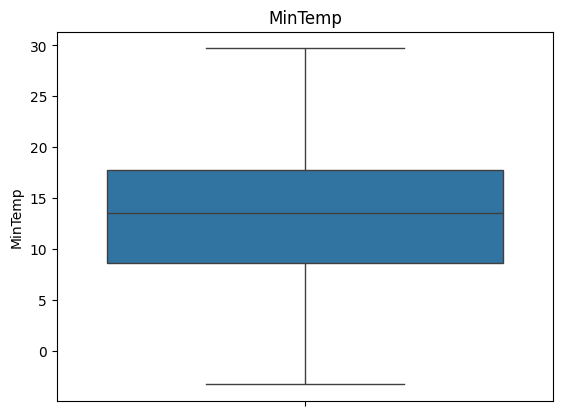

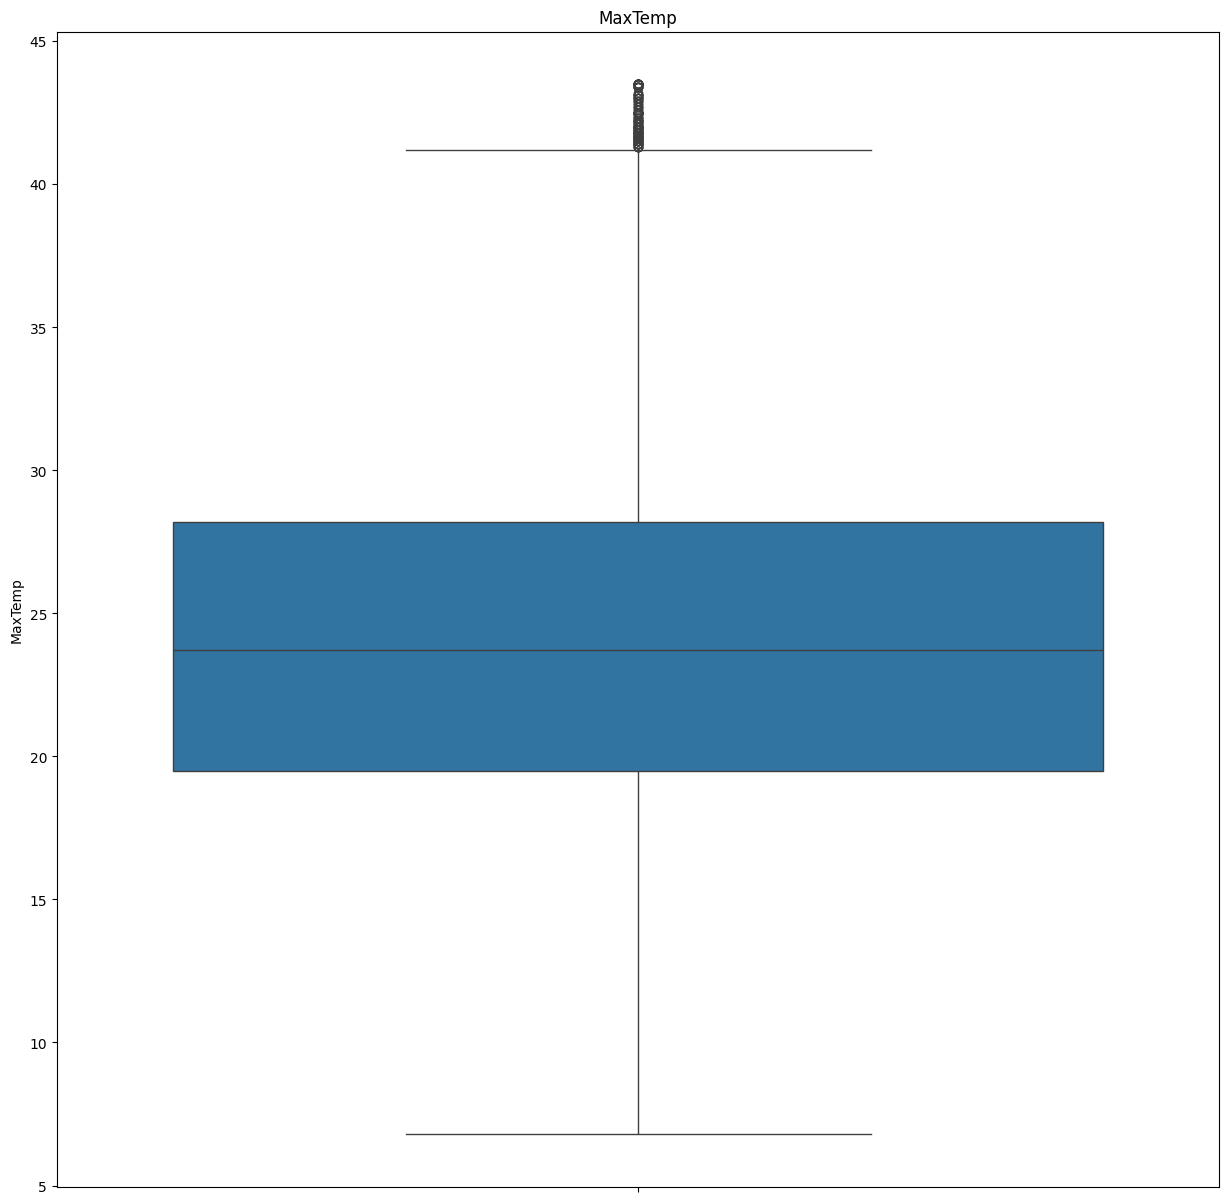

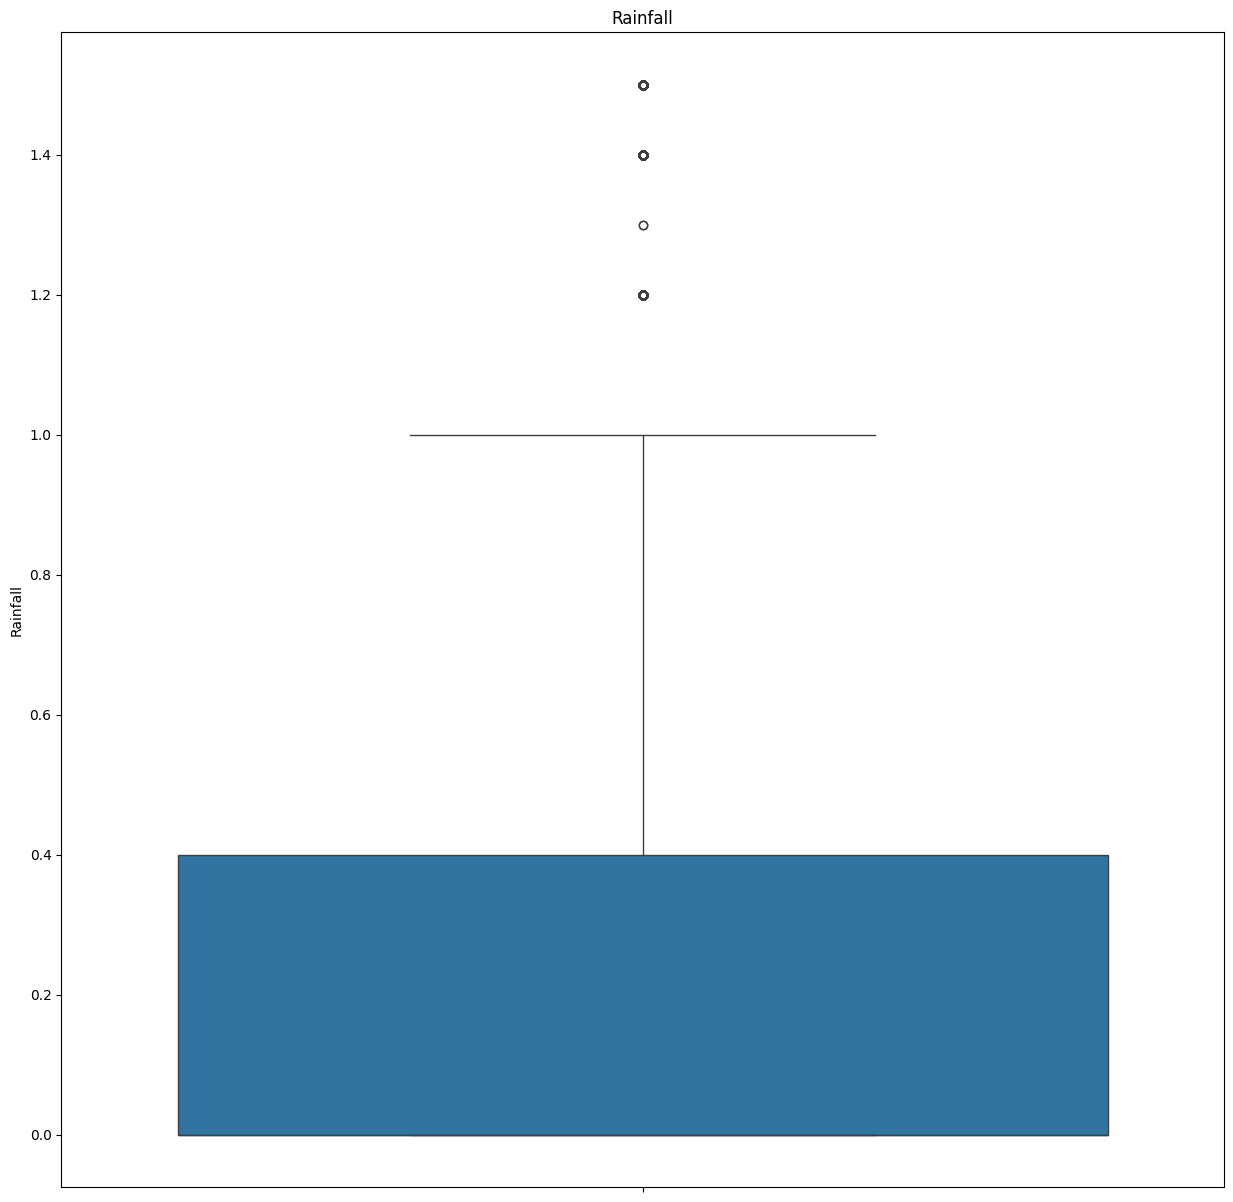

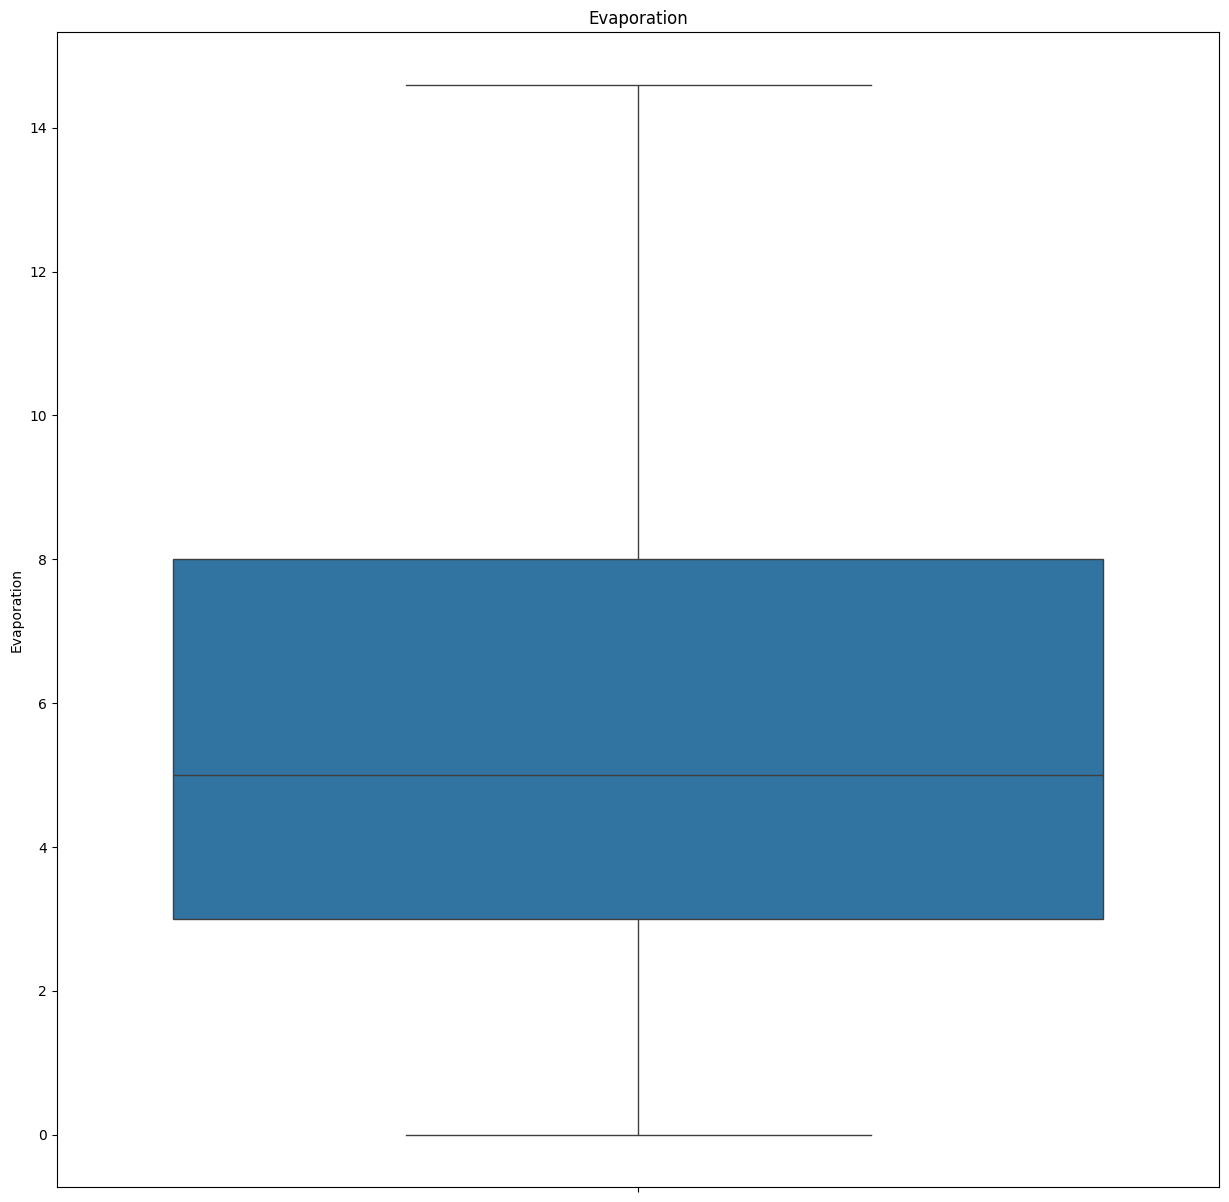

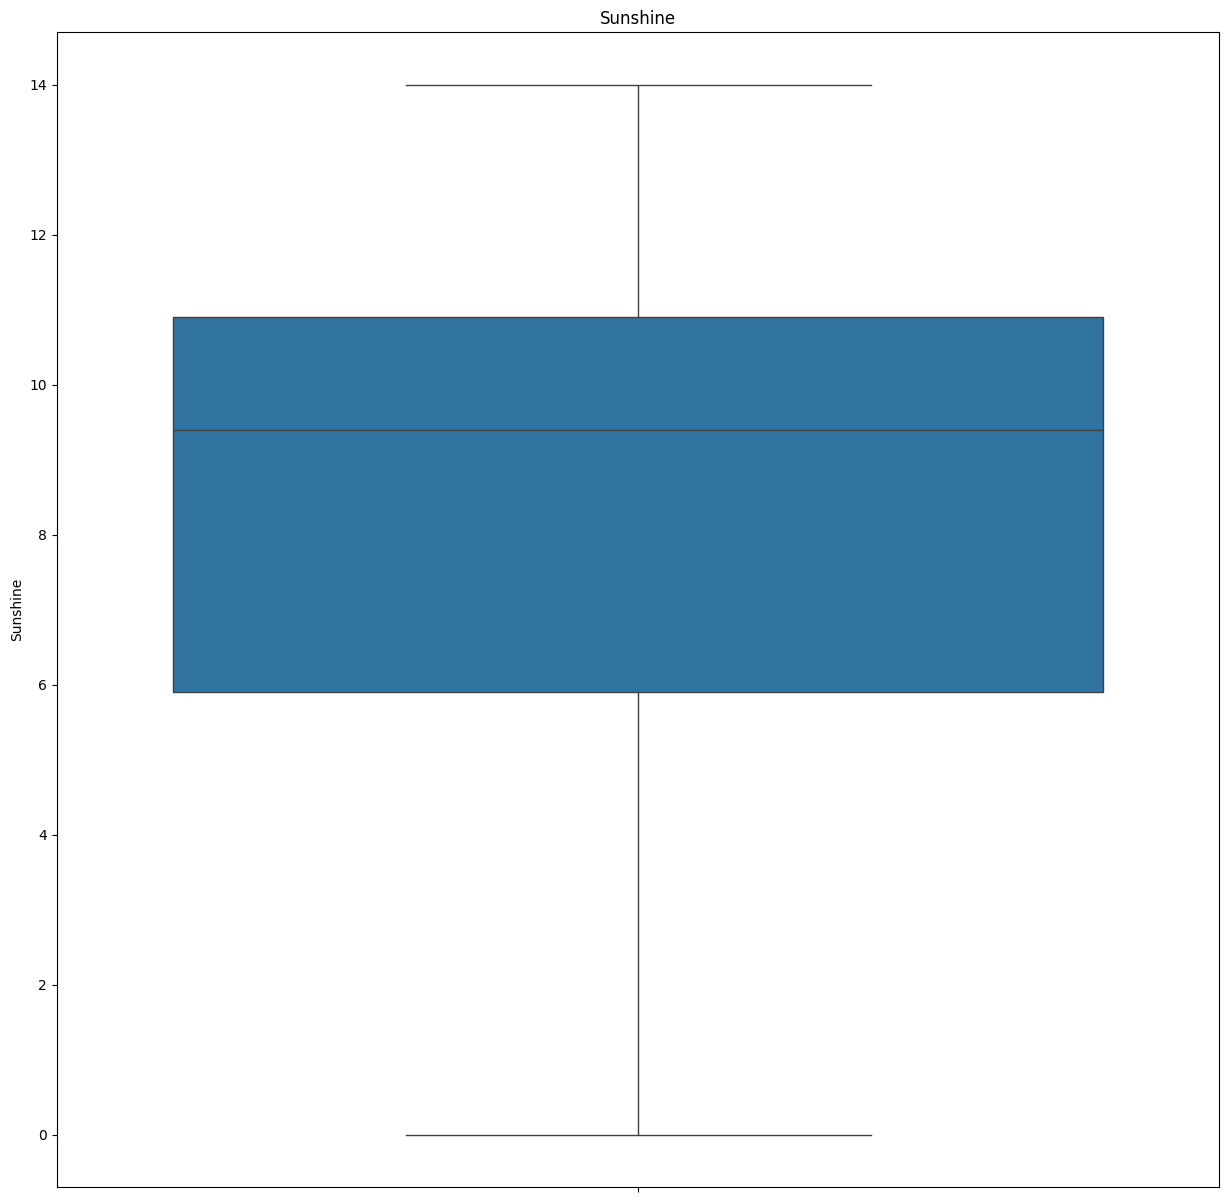

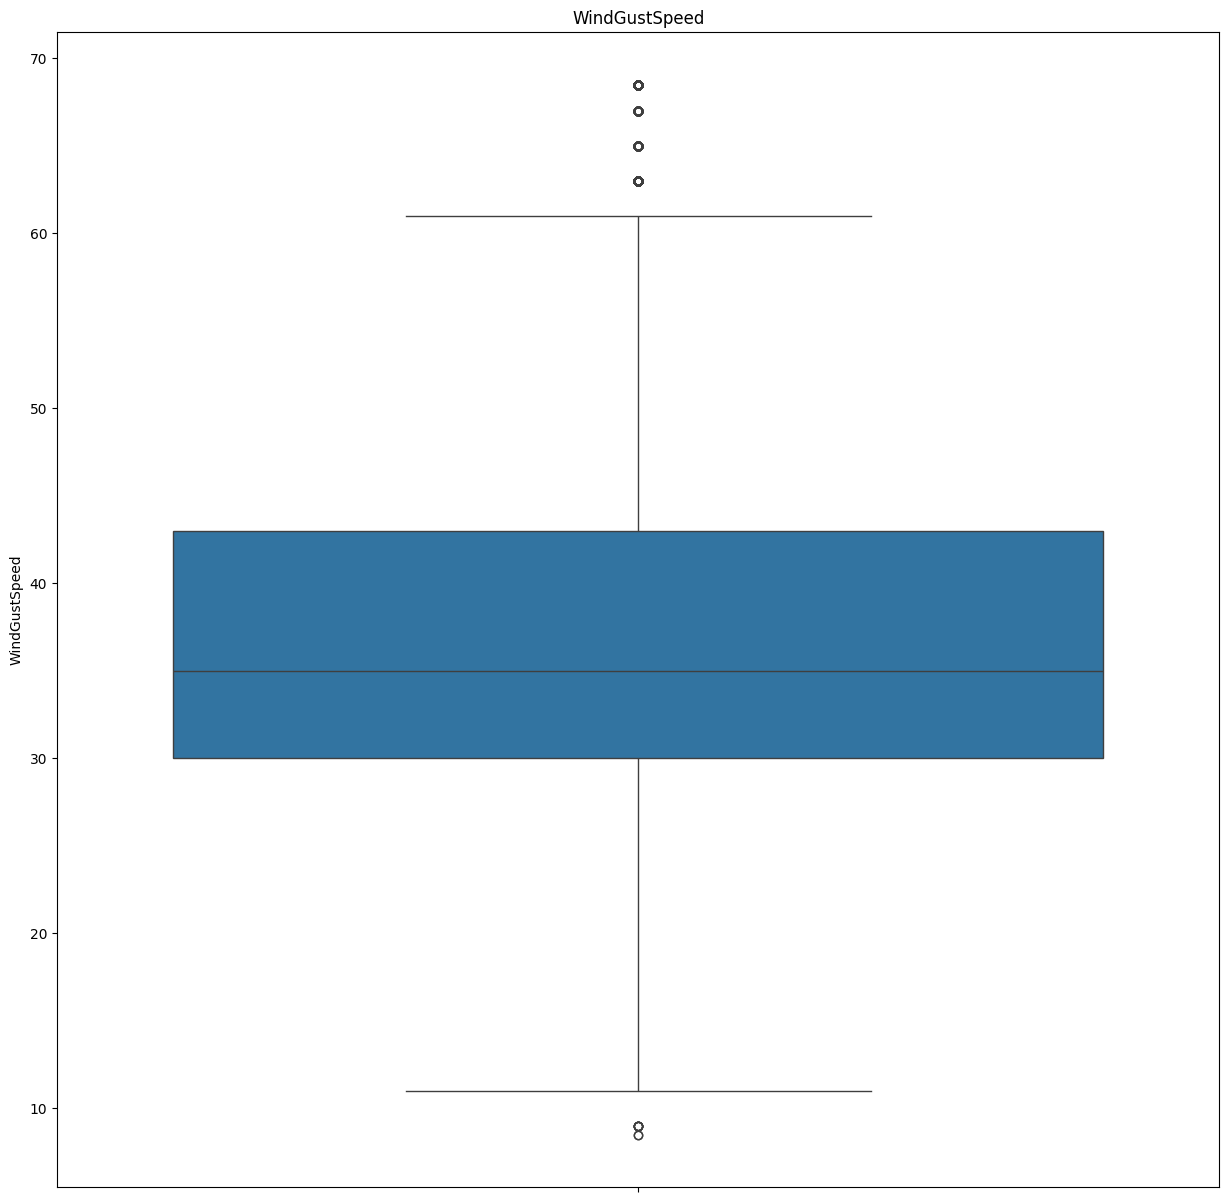

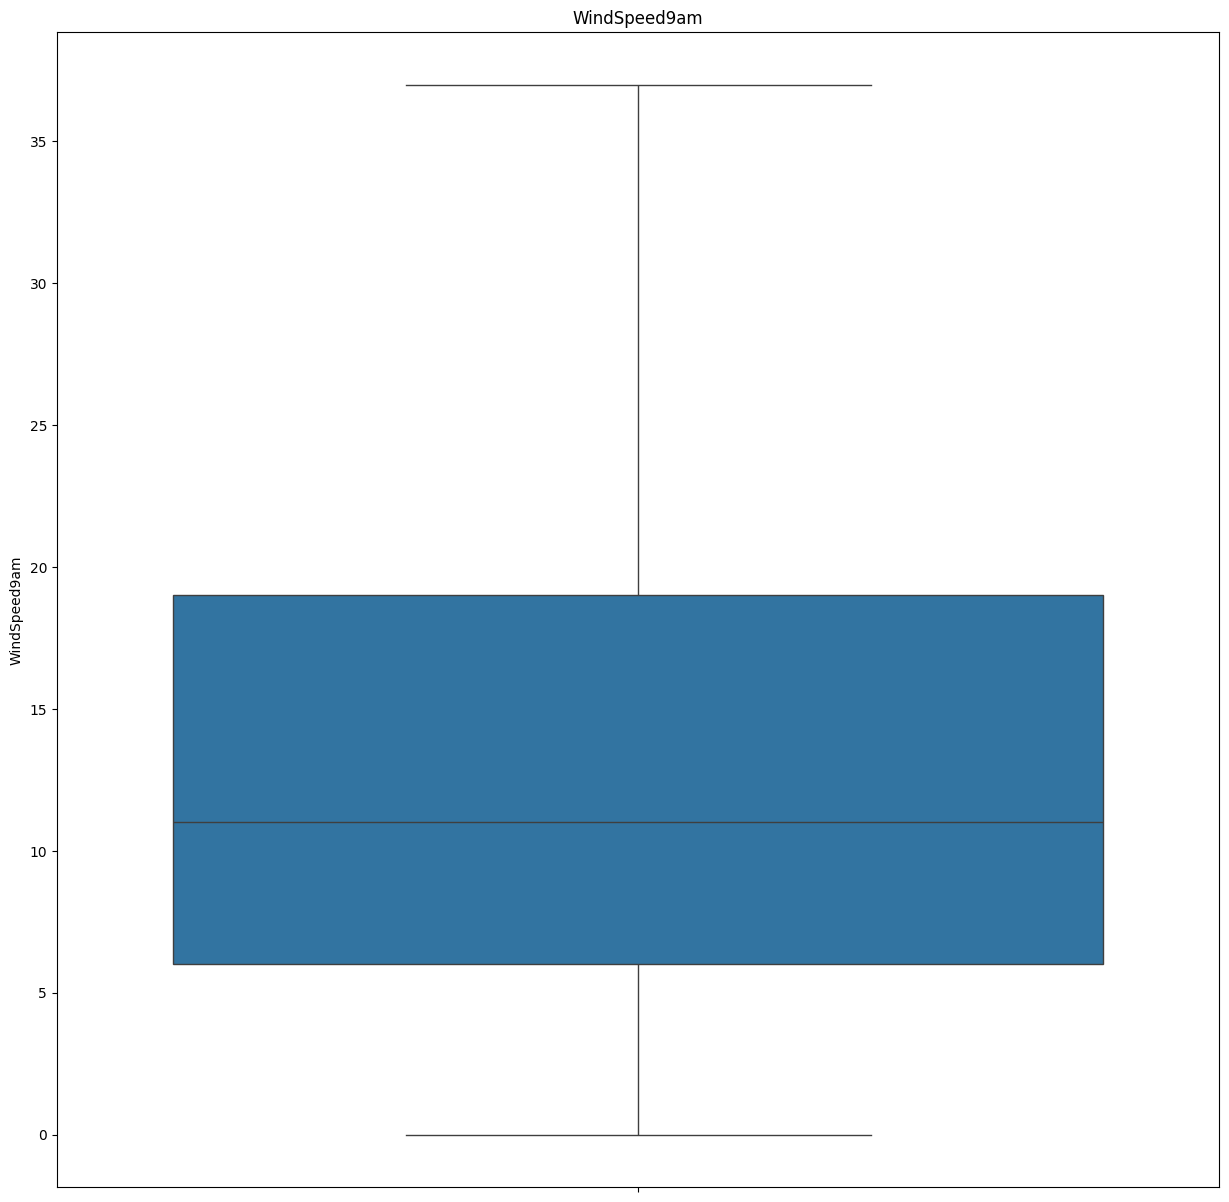

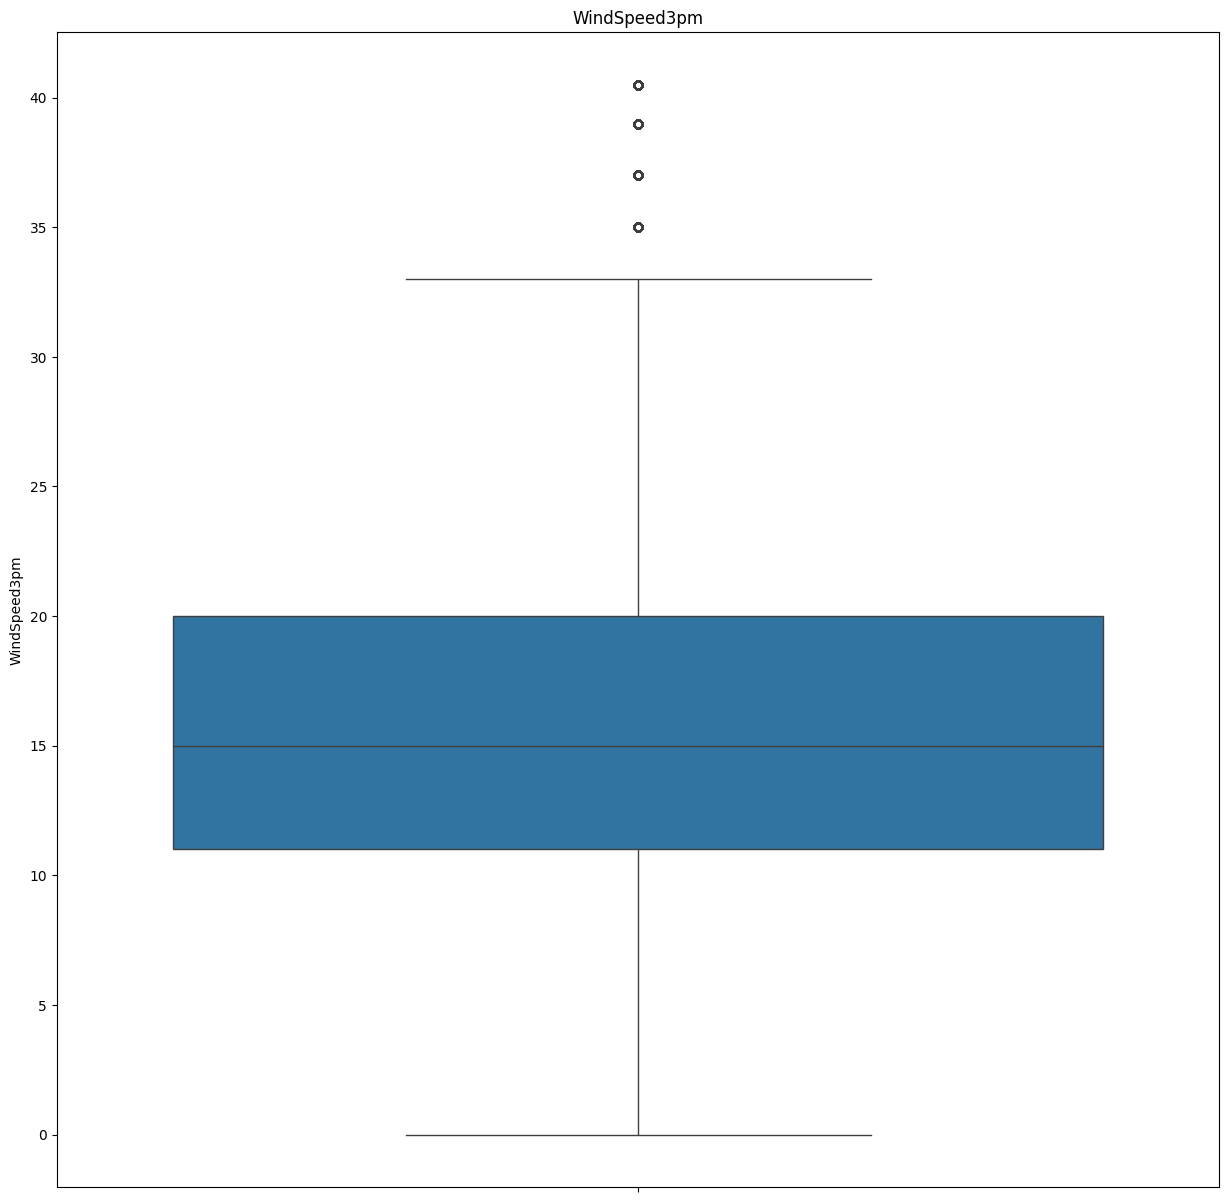

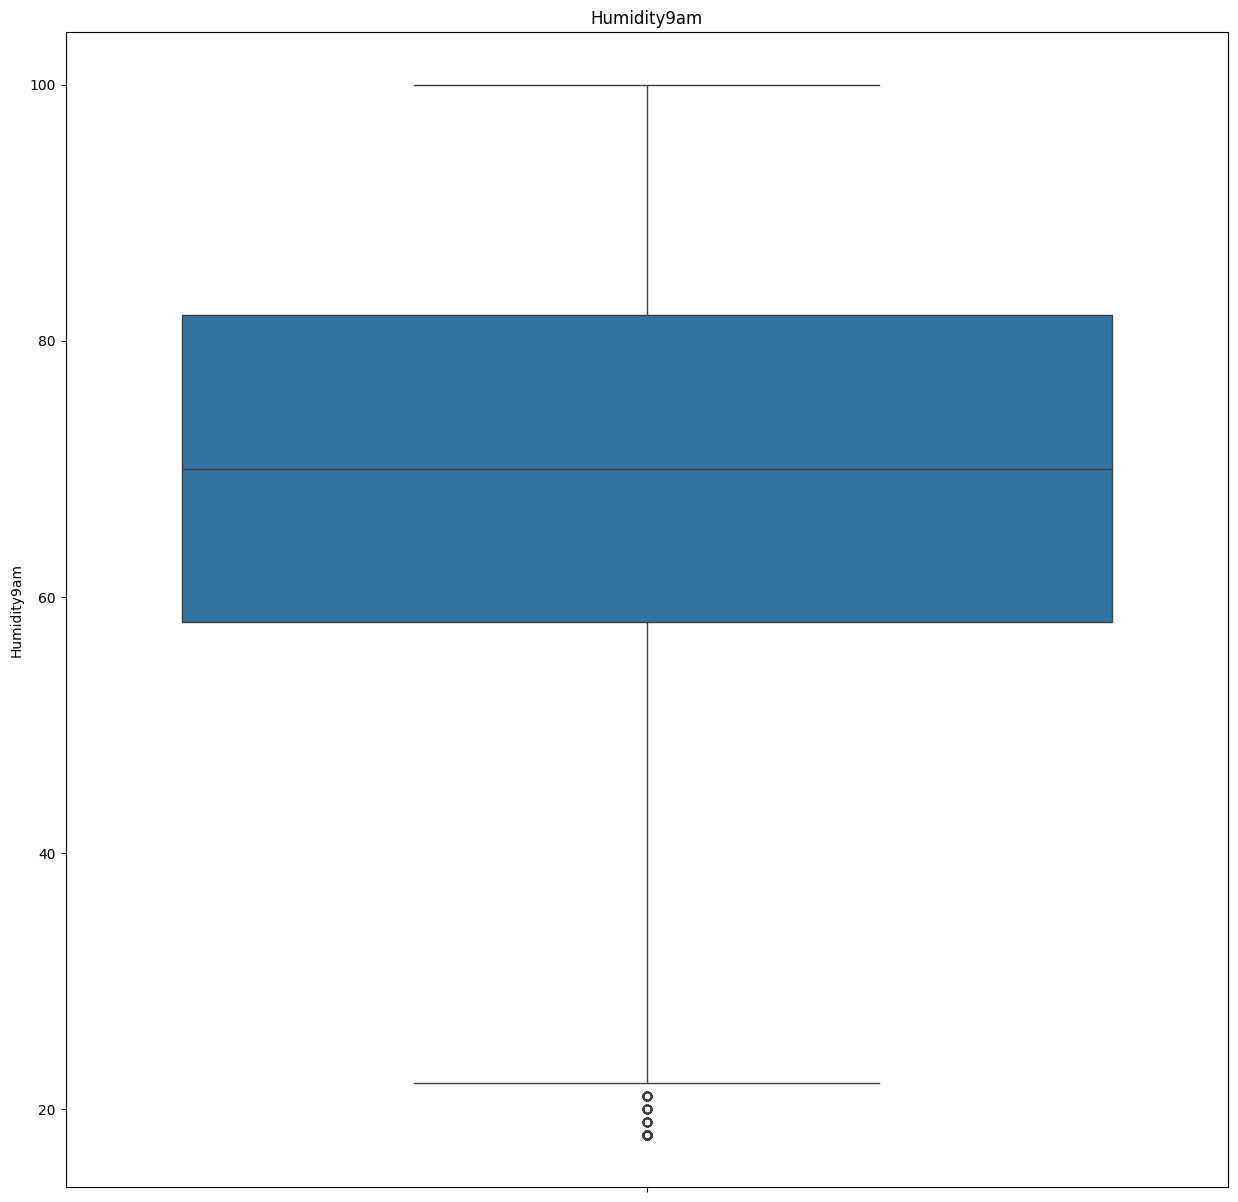

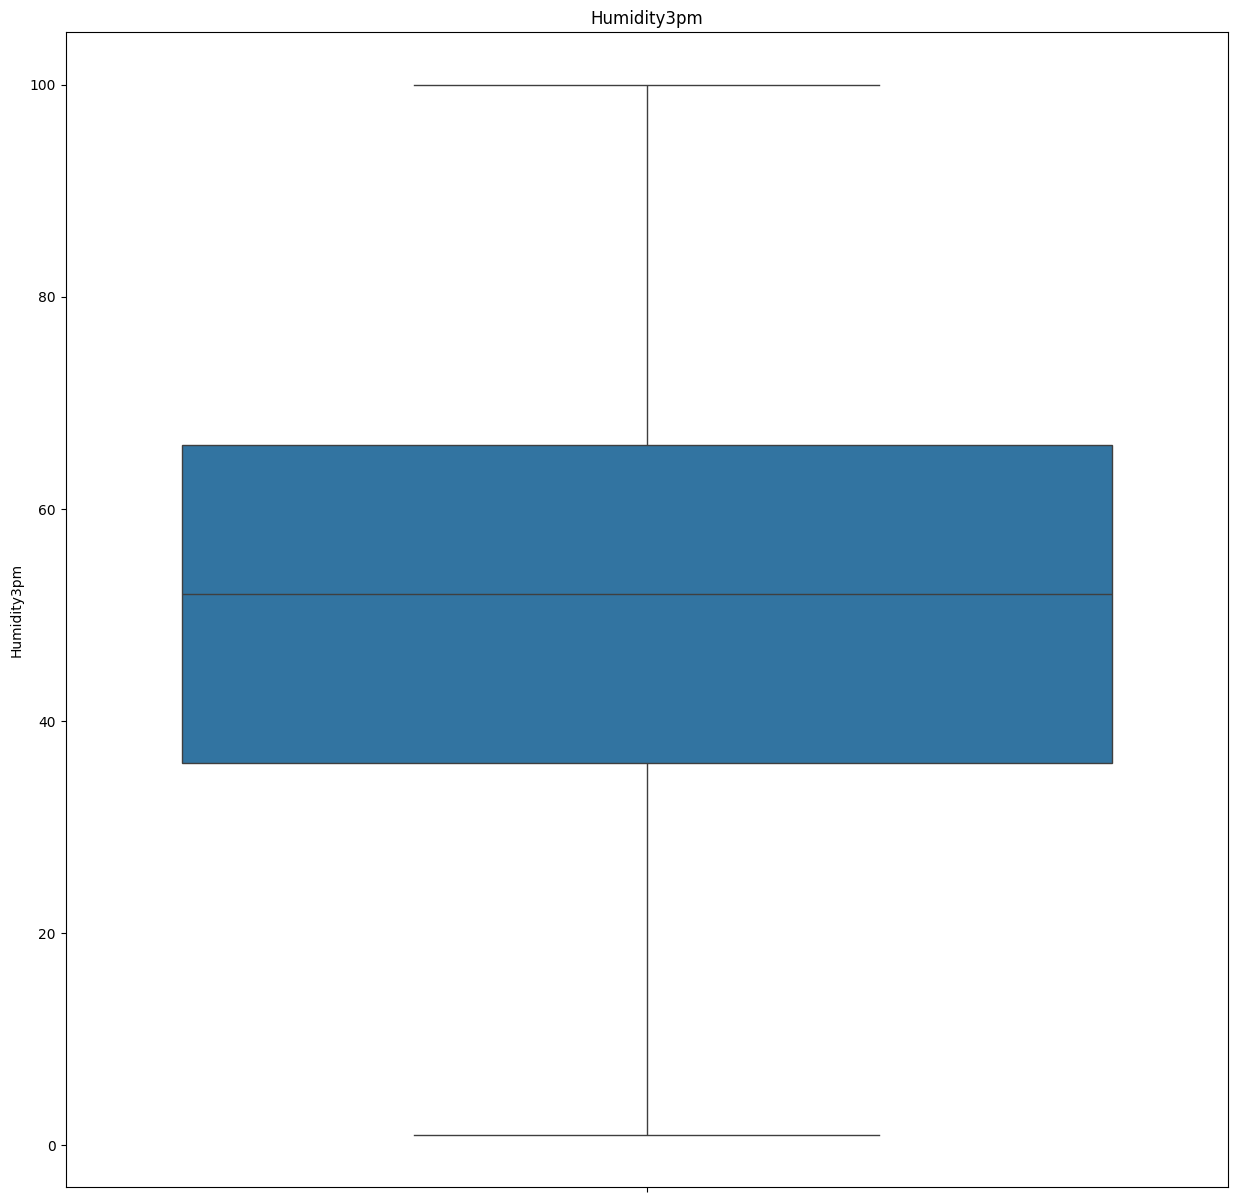

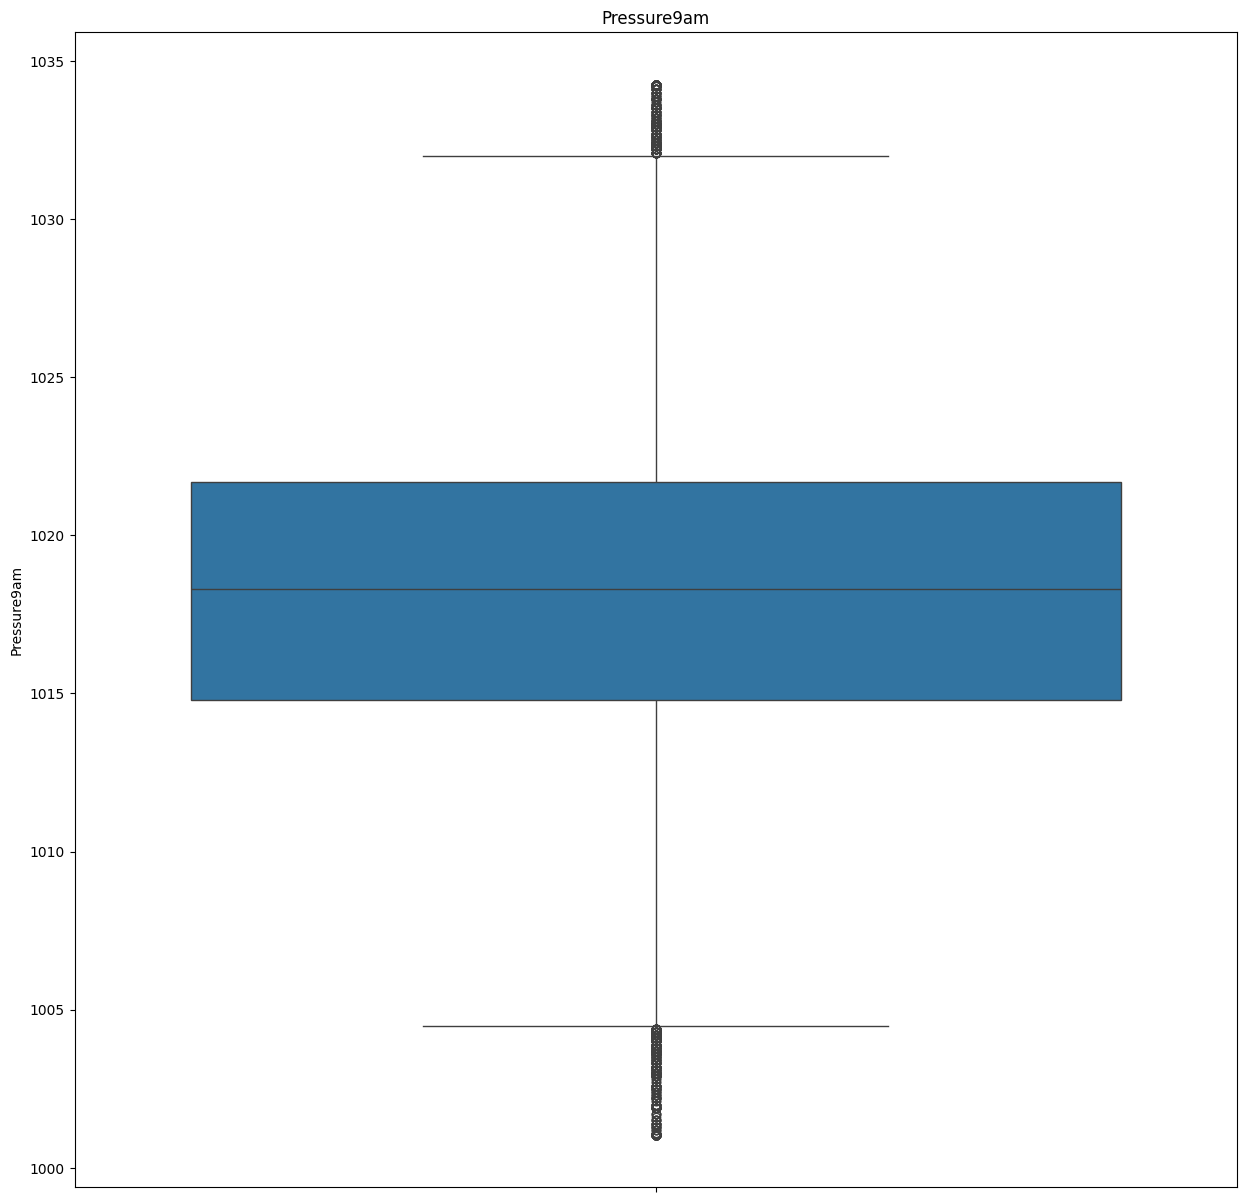

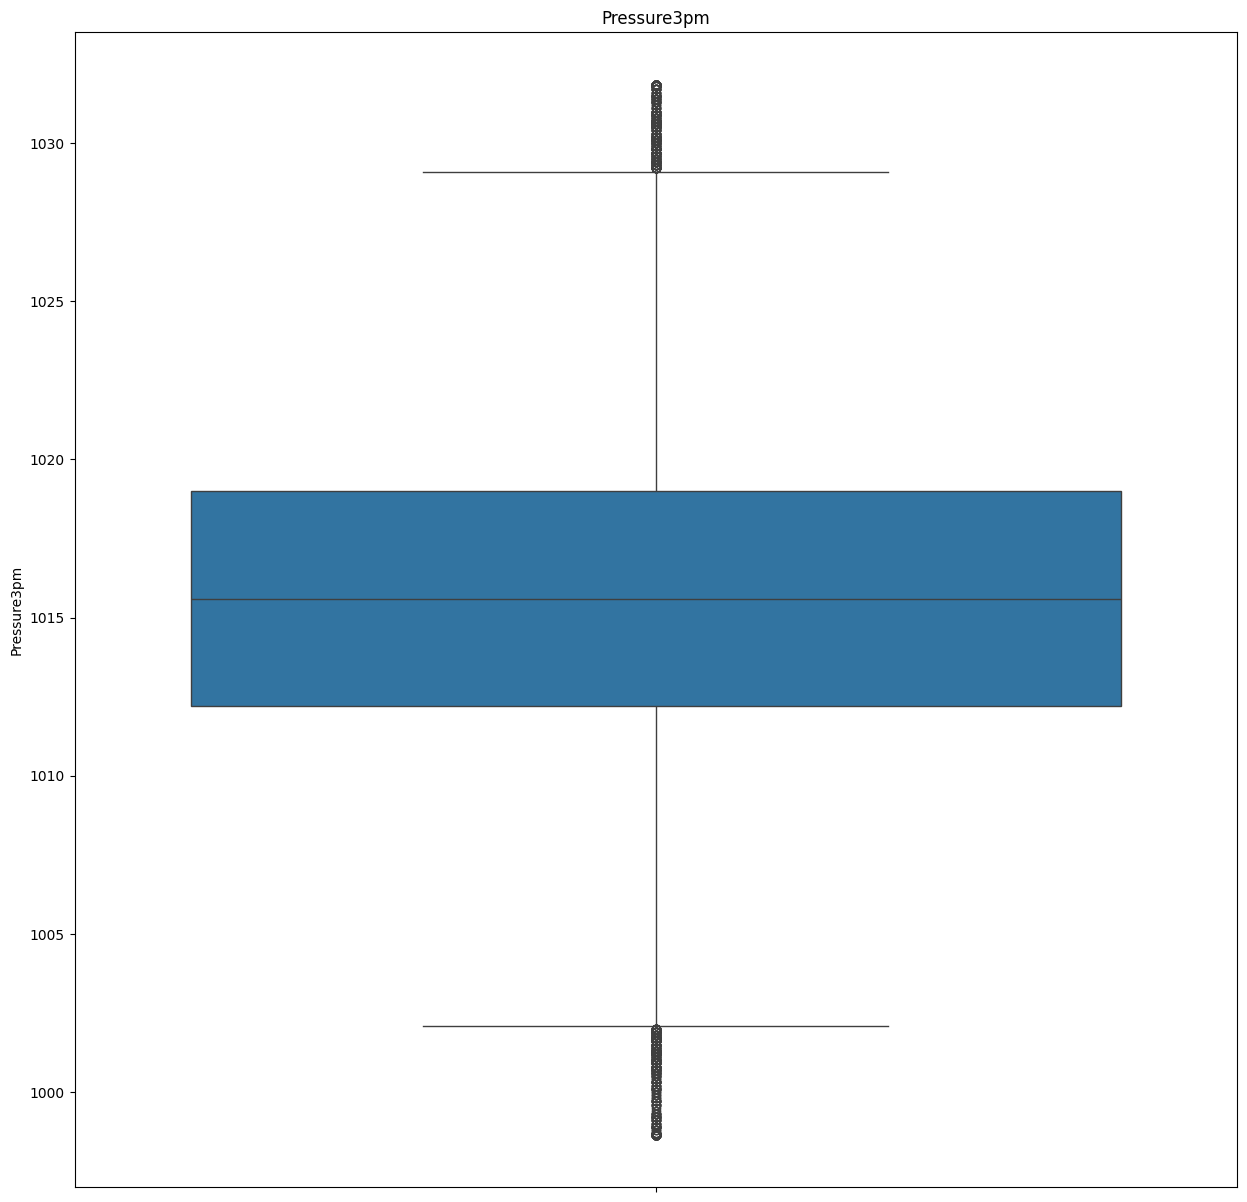

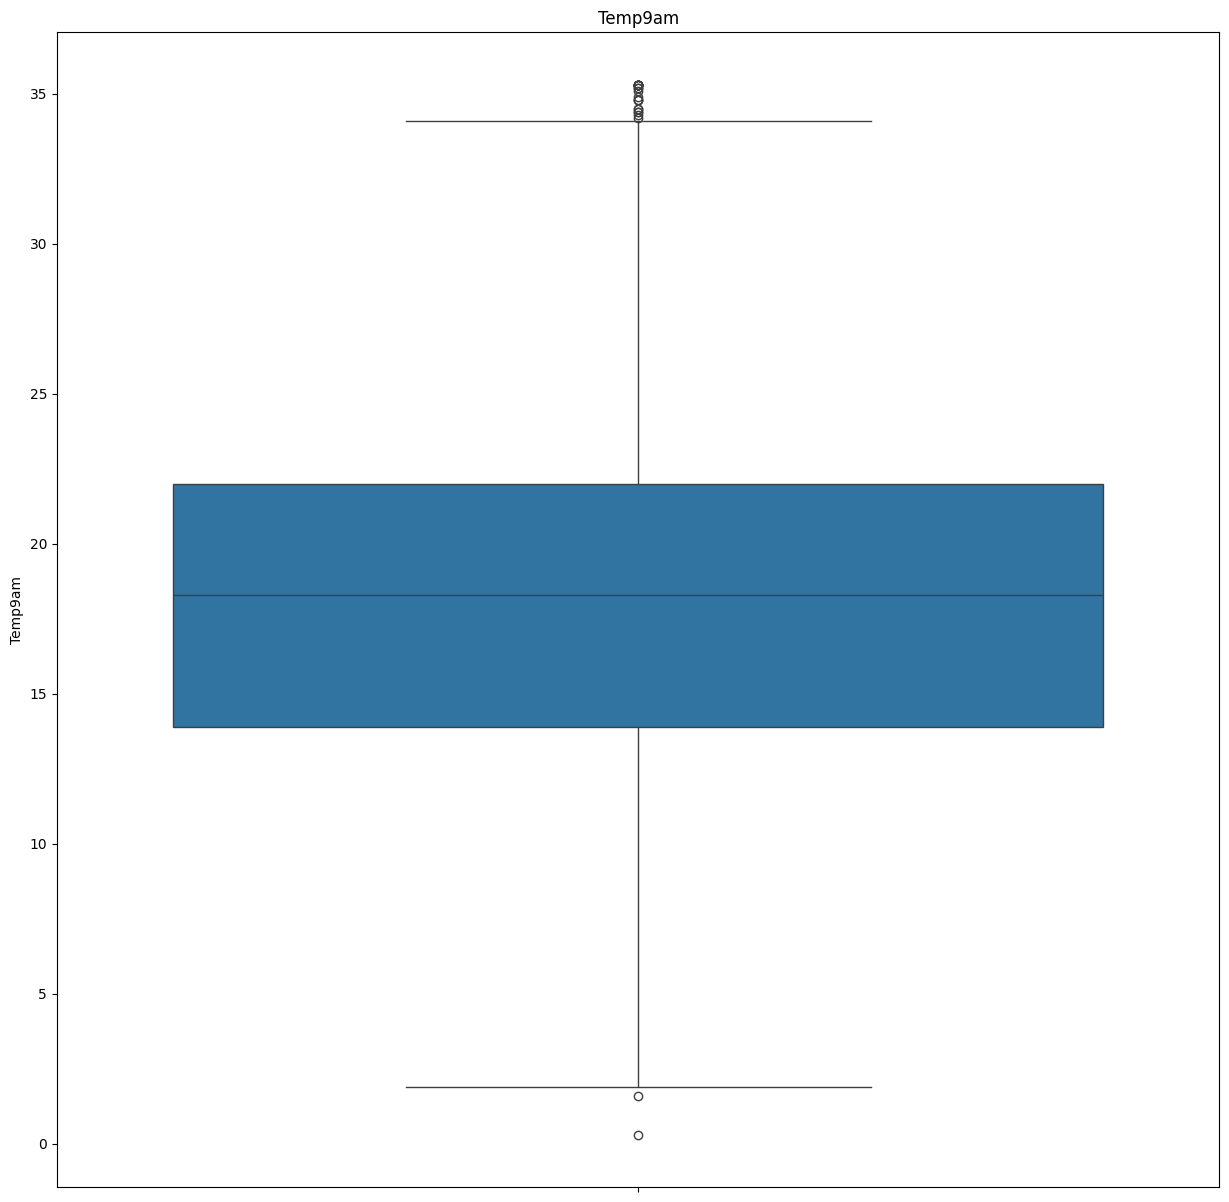

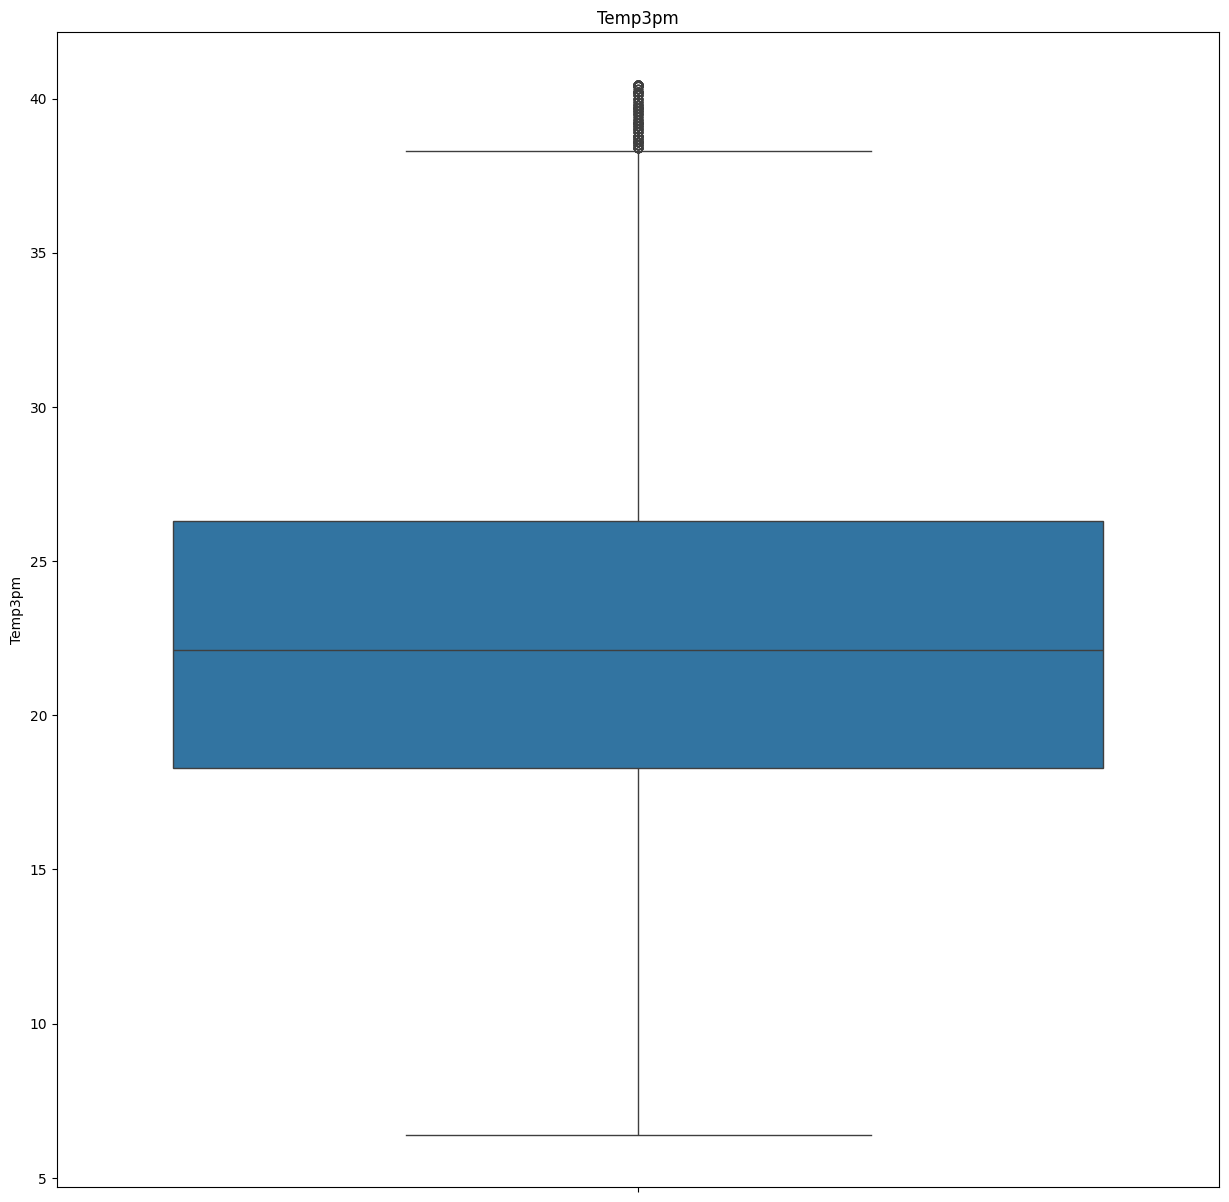

<Figure size 1500x1500 with 0 Axes>

In [64]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [65]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


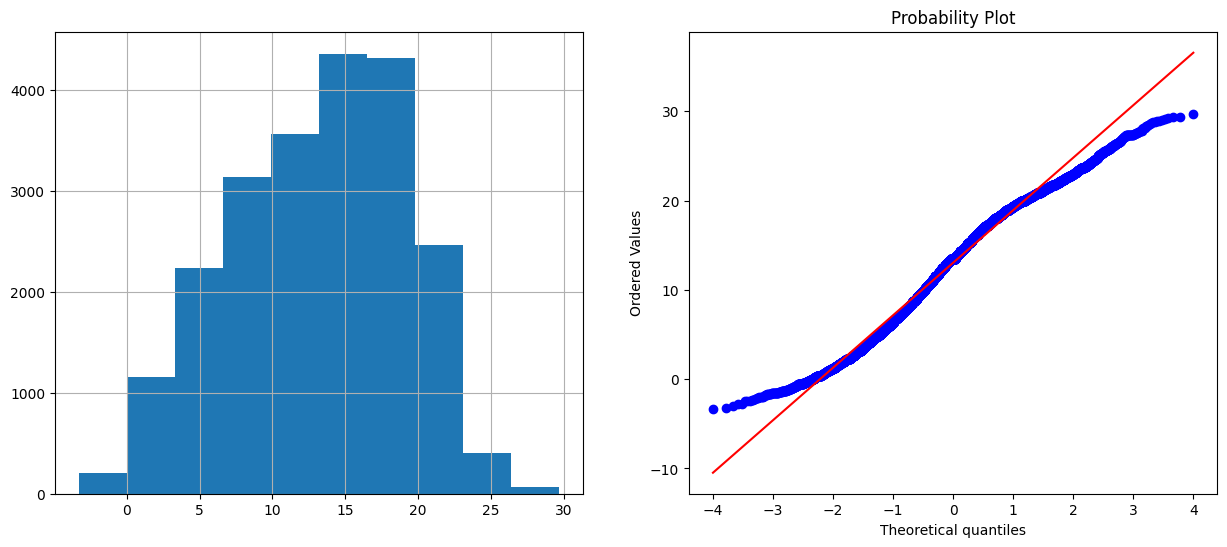

MaxTemp


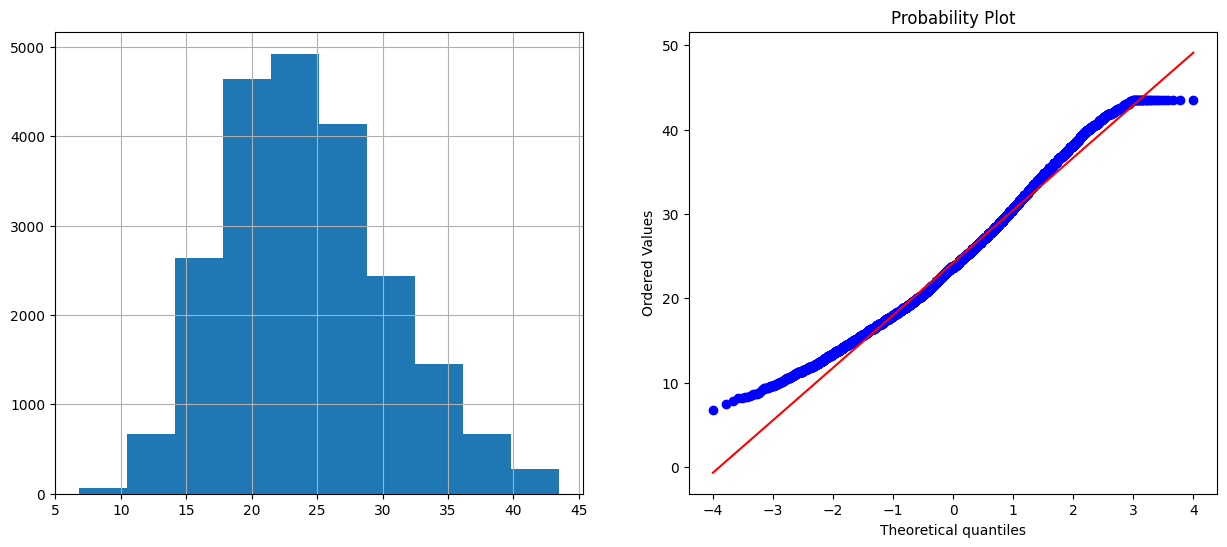

Rainfall


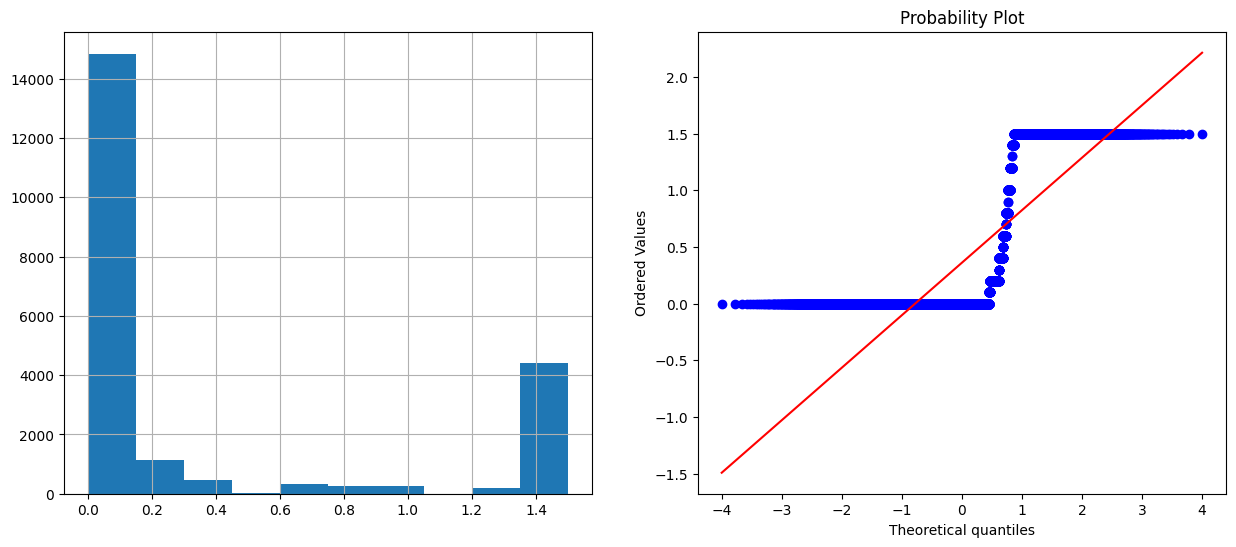

Evaporation


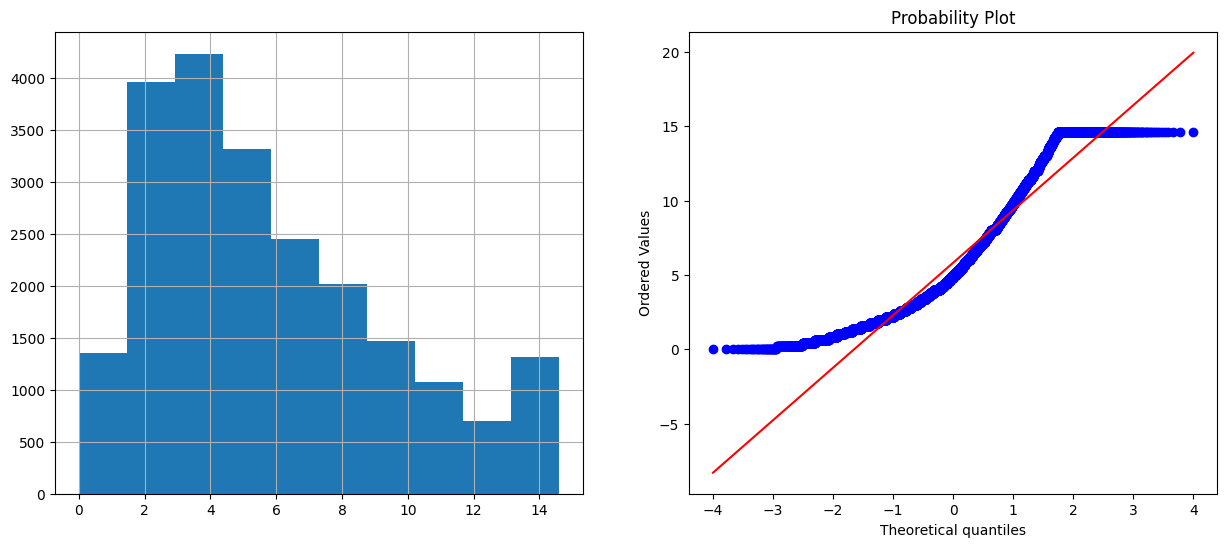

Sunshine


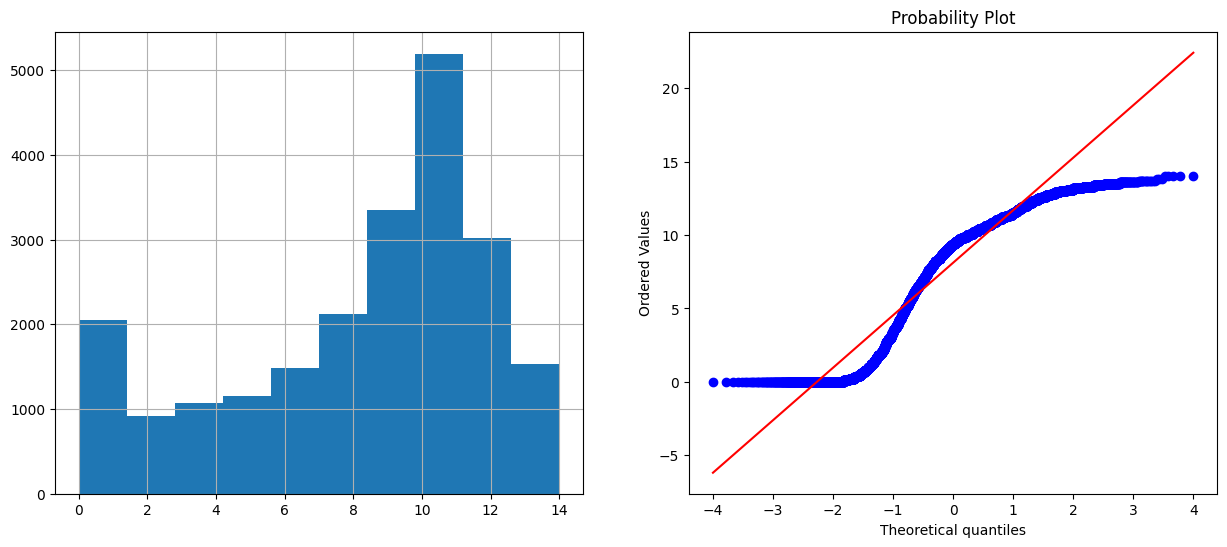

WindGustSpeed


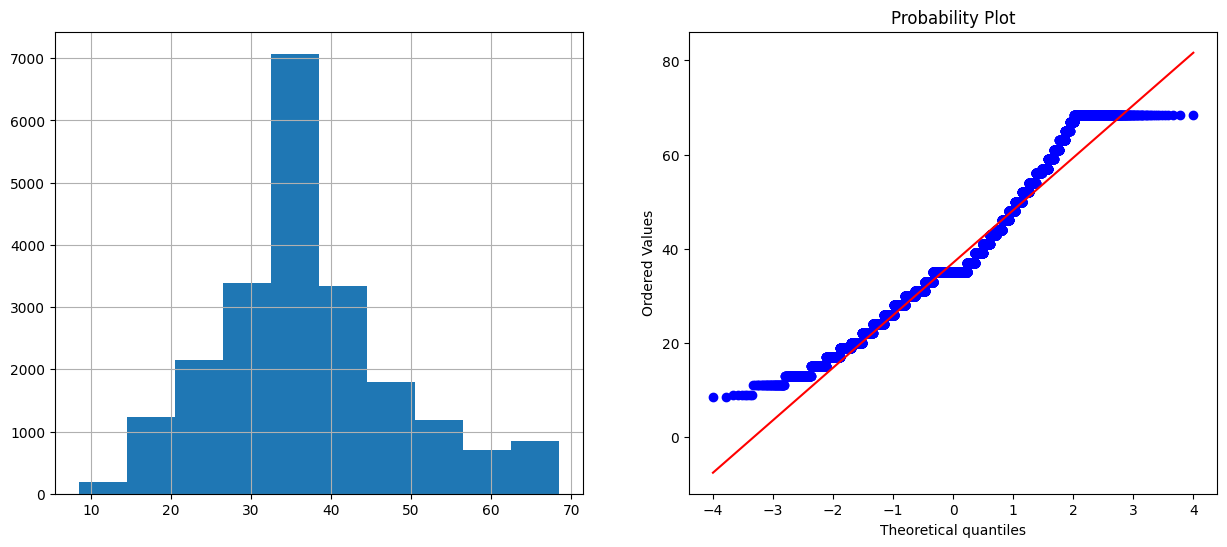

WindSpeed9am


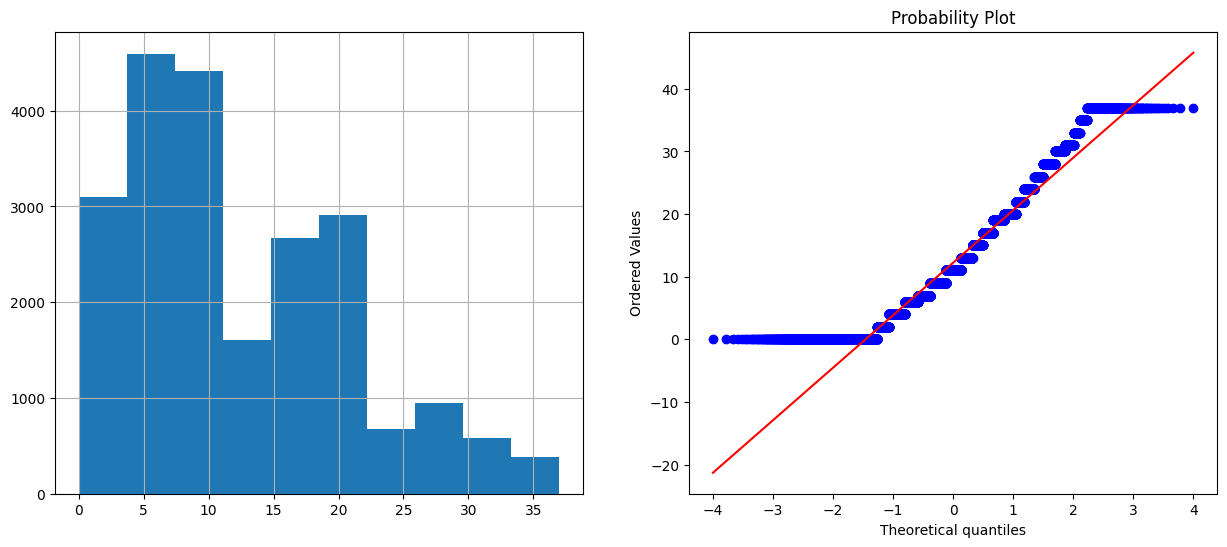

WindSpeed3pm


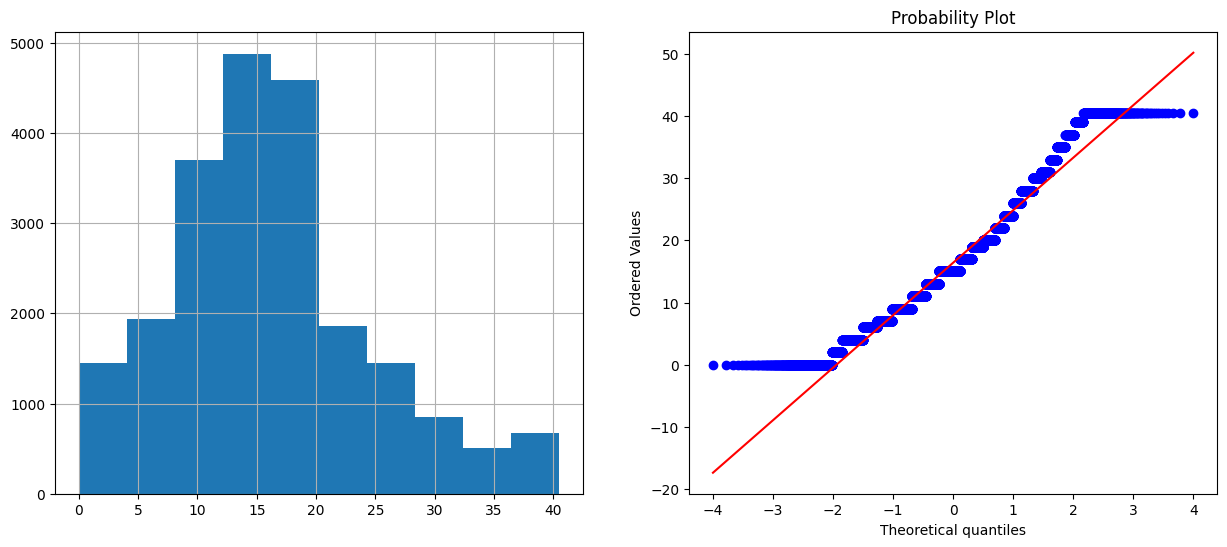

Humidity9am


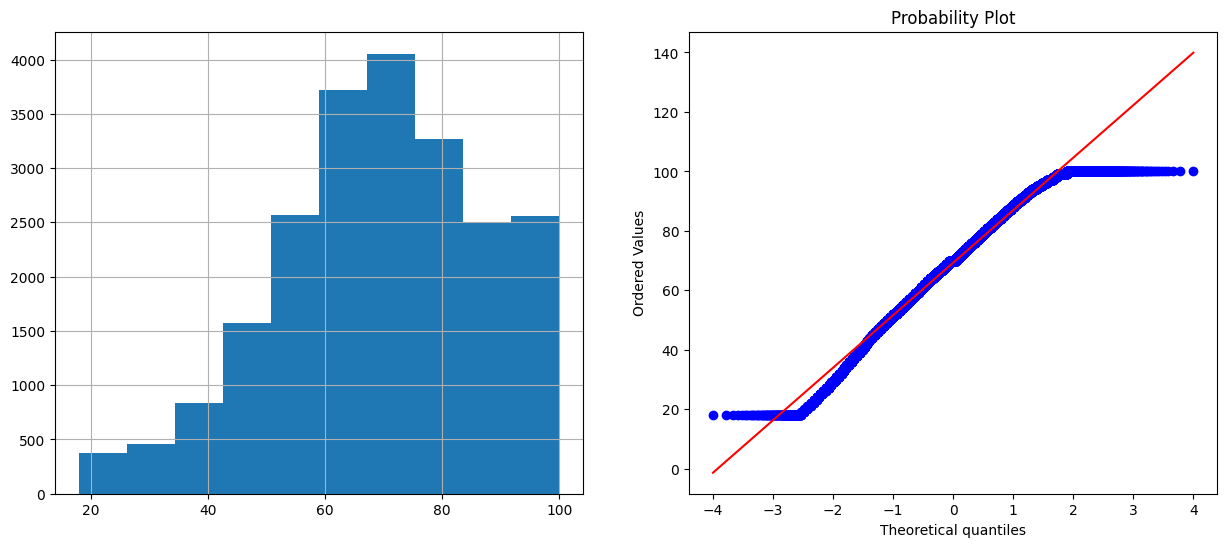

Humidity3pm


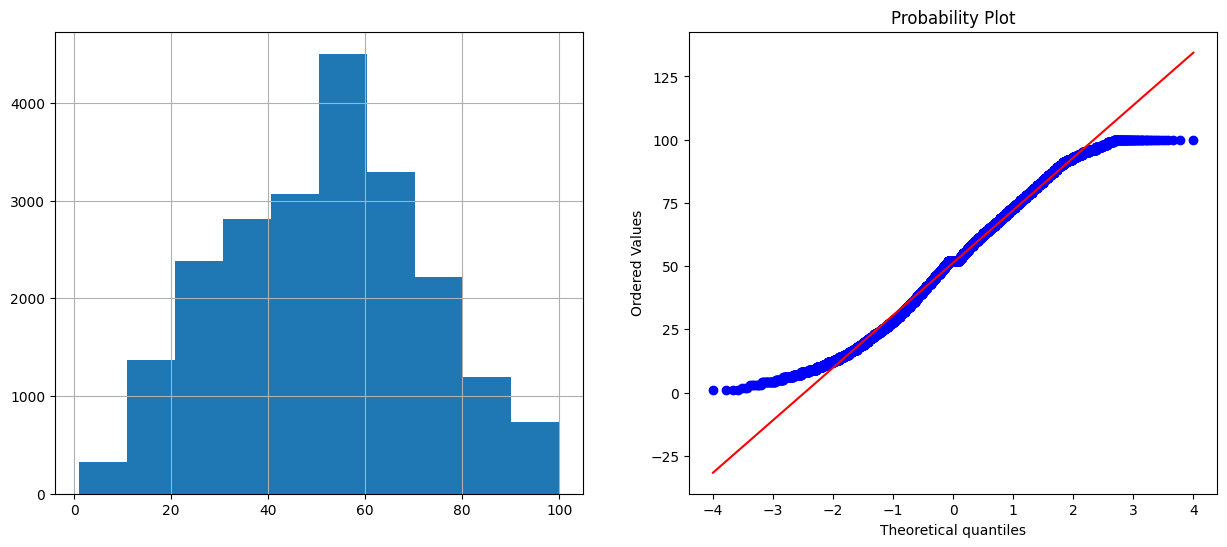

Pressure9am


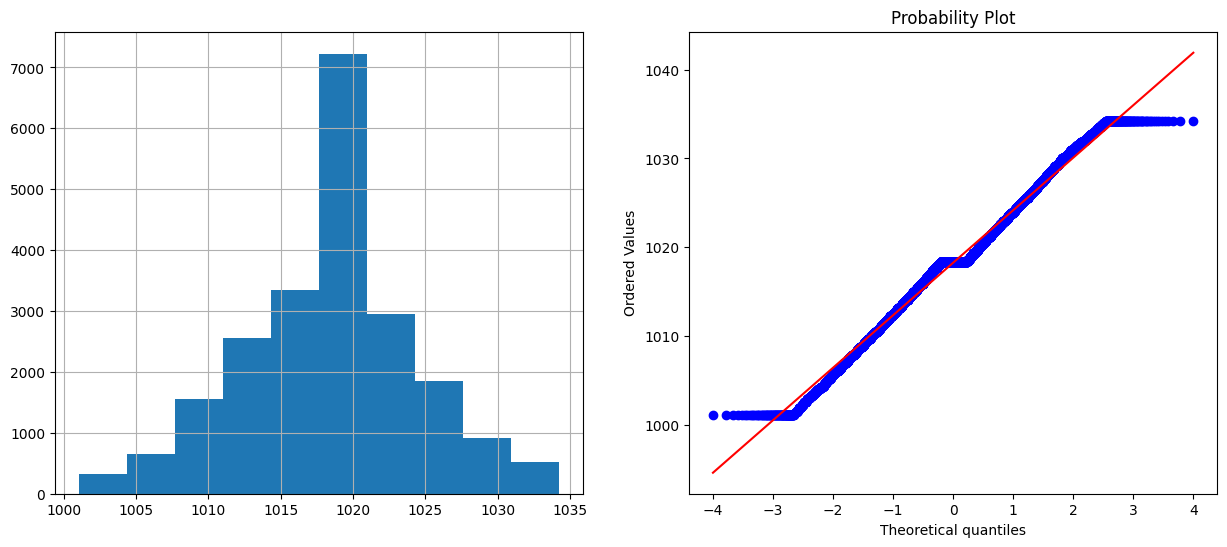

Pressure3pm


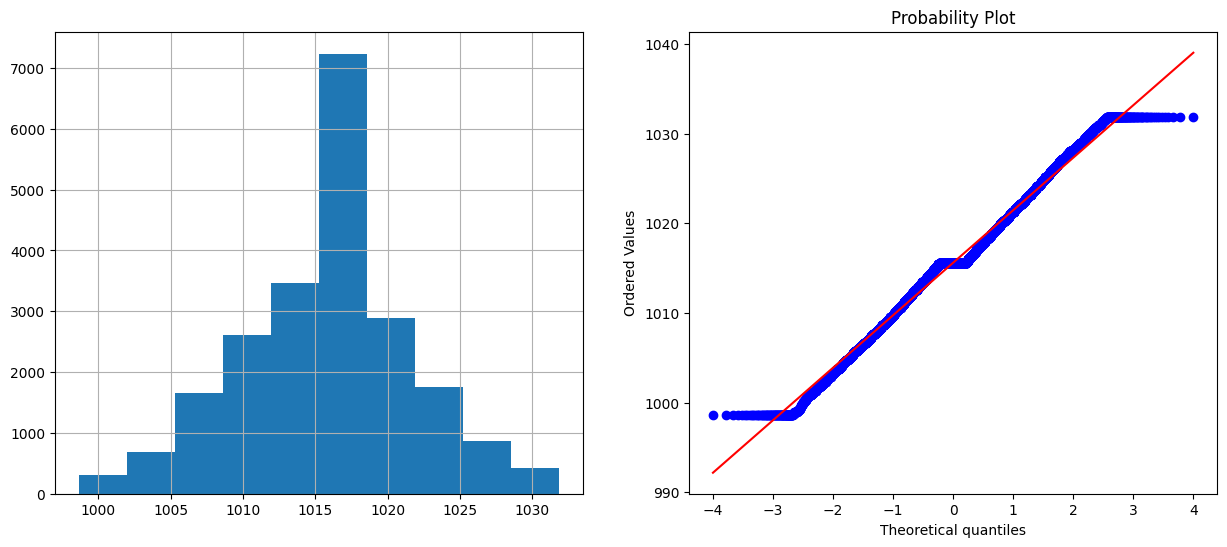

Temp9am


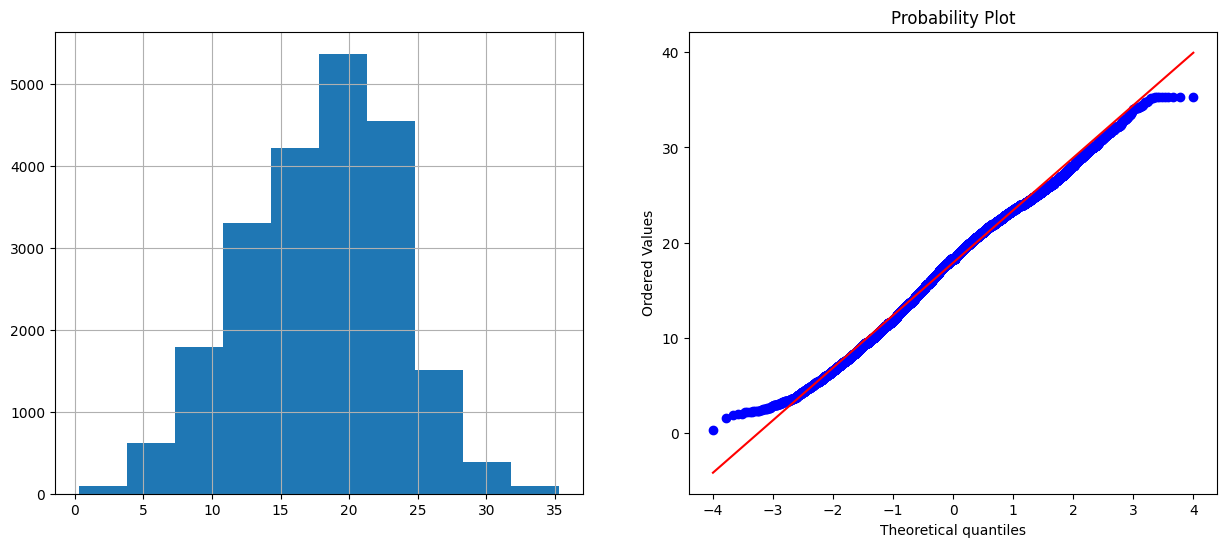

Temp3pm


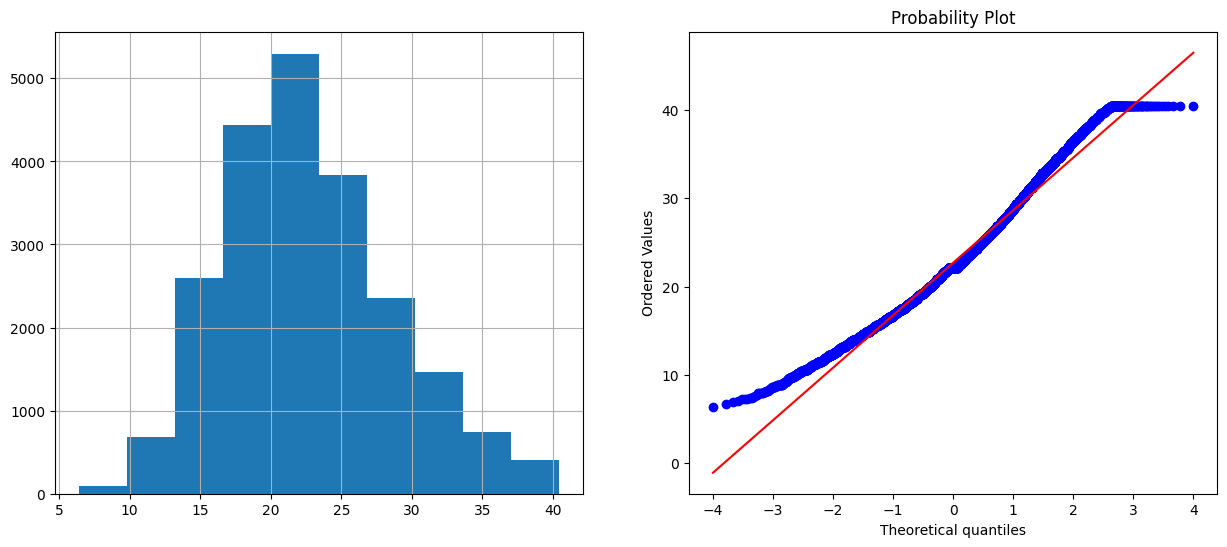

In [66]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [67]:
df.to_csv("preprocessed_1.csv", index=False)

In [68]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [70]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 13842, 1: 3678})
The number of classes after fit Counter({0: 13842, 1: 13842})


In [71]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.022528
0:	total: 84.1ms	remaining: 2m 48s
1:	total: 116ms	remaining: 1m 55s
2:	total: 133ms	remaining: 1m 28s
3:	total: 163ms	remaining: 1m 21s
4:	total: 198ms	remaining: 1m 19s
5:	total: 220ms	remaining: 1m 13s
6:	total: 252ms	remaining: 1m 11s
7:	total: 282ms	remaining: 1m 10s
8:	total: 309ms	remaining: 1m 8s
9:	total: 339ms	remaining: 1m 7s
10:	total: 373ms	remaining: 1m 7s
11:	total: 406ms	remaining: 1m 7s
12:	total: 437ms	remaining: 1m 6s
13:	total: 467ms	remaining: 1m 6s
14:	total: 501ms	remaining: 1m 6s
15:	total: 540ms	remaining: 1m 6s
16:	total: 575ms	remaining: 1m 7s
17:	total: 613ms	remaining: 1m 7s
18:	total: 648ms	remaining: 1m 7s
19:	total: 665ms	remaining: 1m 5s
20:	total: 677ms	remaining: 1m 3s
21:	total: 690ms	remaining: 1m 2s
22:	total: 703ms	remaining: 1m
23:	total: 715ms	remaining: 58.8s
24:	total: 727ms	remaining: 57.4s
25:	total: 756ms	remaining: 57.4s
26:	total: 768ms	remaining: 56.1s
27:	total: 780ms	remaining: 55s
28:	total: 792ms	remaini

In [72]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3290  171]
 [ 439  480]]
0.860730593607306
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      3461
           1       0.74      0.52      0.61       919

    accuracy                           0.86      4380
   macro avg       0.81      0.74      0.76      4380
weighted avg       0.85      0.86      0.85      4380



In [73]:
metrics.roc_auc_score(y_test, y_pred, average=None)

0.7364495848187436

In [74]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [75]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[3180  281]
 [ 412  507]]
0.8417808219178082
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3461
           1       0.64      0.55      0.59       919

    accuracy                           0.84      4380
   macro avg       0.76      0.74      0.75      4380
weighted avg       0.83      0.84      0.84      4380



In [76]:
metrics.roc_auc_score(y_test, y_pred1, average=None)

0.7352481042450637

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[2730  731]
 [ 229  690]]
0.7808219178082192
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      3461
           1       0.49      0.75      0.59       919

    accuracy                           0.78      4380
   macro avg       0.70      0.77      0.72      4380
weighted avg       0.83      0.78      0.80      4380



In [79]:
metrics.roc_auc_score(y_test, y_pred2, average=None)

0.7698027358481372

In [80]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [81]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[2618  843]
 [ 264  655]]
0.7472602739726028
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3461
           1       0.44      0.71      0.54       919

    accuracy                           0.75      4380
   macro avg       0.67      0.73      0.68      4380
weighted avg       0.81      0.75      0.77      4380



In [82]:
metrics.roc_auc_score(y_test, y_pred3, average=None)

0.734580003703635

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[2645  816]
 [ 276  643]]
0.7506849315068493
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      3461
           1       0.44      0.70      0.54       919

    accuracy                           0.75      4380
   macro avg       0.67      0.73      0.68      4380
weighted avg       0.81      0.75      0.77      4380



In [85]:
metrics.roc_auc_score(y_test, y_pred4, average=None)

0.7319517747737183

In [86]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[3253  208]
 [ 435  484]]
0.8531963470319635
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3461
           1       0.70      0.53      0.60       919

    accuracy                           0.85      4380
   macro avg       0.79      0.73      0.76      4380
weighted avg       0.84      0.85      0.85      4380



In [88]:
metrics.roc_auc_score(y_test, y_pred6, average=None)

0.7332805874505881

In [89]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [90]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[2669  792]
 [ 231  688]]
0.7664383561643836
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      3461
           1       0.46      0.75      0.57       919

    accuracy                           0.77      4380
   macro avg       0.69      0.76      0.71      4380
weighted avg       0.82      0.77      0.78      4380



In [91]:
metrics.roc_auc_score(y_test, y_pred5, average=None)

0.7599021146246737